# Project #1 Detecting Patterns in Tabular Medical Data with MIMIC-III

---


You can read more about the dataset here: https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

Dr. Barak Or

In [1]:
my_path="/Users/arielsoothy/Downloads/"


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the data
data = pd.read_csv(my_path + "MIMIC_data.csv")

In [3]:
print(data.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [4]:
print(data.columns)

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')


In [5]:
stats_df = pd.DataFrame({
    'Mean': [data['age'].mean(), data['BMI'].mean(), data['Blood sodium'].mean()],
    'Median': [data['age'].median(), data['BMI'].median(), data['Blood sodium'].median()],
    'Mode': [data['age'].mode()[0], data['BMI'].mode()[0], data['Blood sodium'].mode()[0]],
    'Std Dev': [data['age'].std(), data['BMI'].std(), data['Blood sodium'].std()]
}, index=['Age', 'BMI', 'Blood sodium'])

print(stats_df)

                    Mean      Median        Mode    Std Dev
Age            74.055225   77.000000   89.000000  13.434061
BMI            30.188278   28.312474   23.296976   9.325997
Blood sodium  138.890016  139.250000  140.000000   4.151347


## Enhanced Distribution Analysis for Q1.b

**Question 1.b:** How do the distributions of age, BMI, and Blood sodium look in the dataset? What can we learn from these distributions about the patient population?

Let's create detailed visualizations of these three key distributions to understand the characteristics of our patient population.

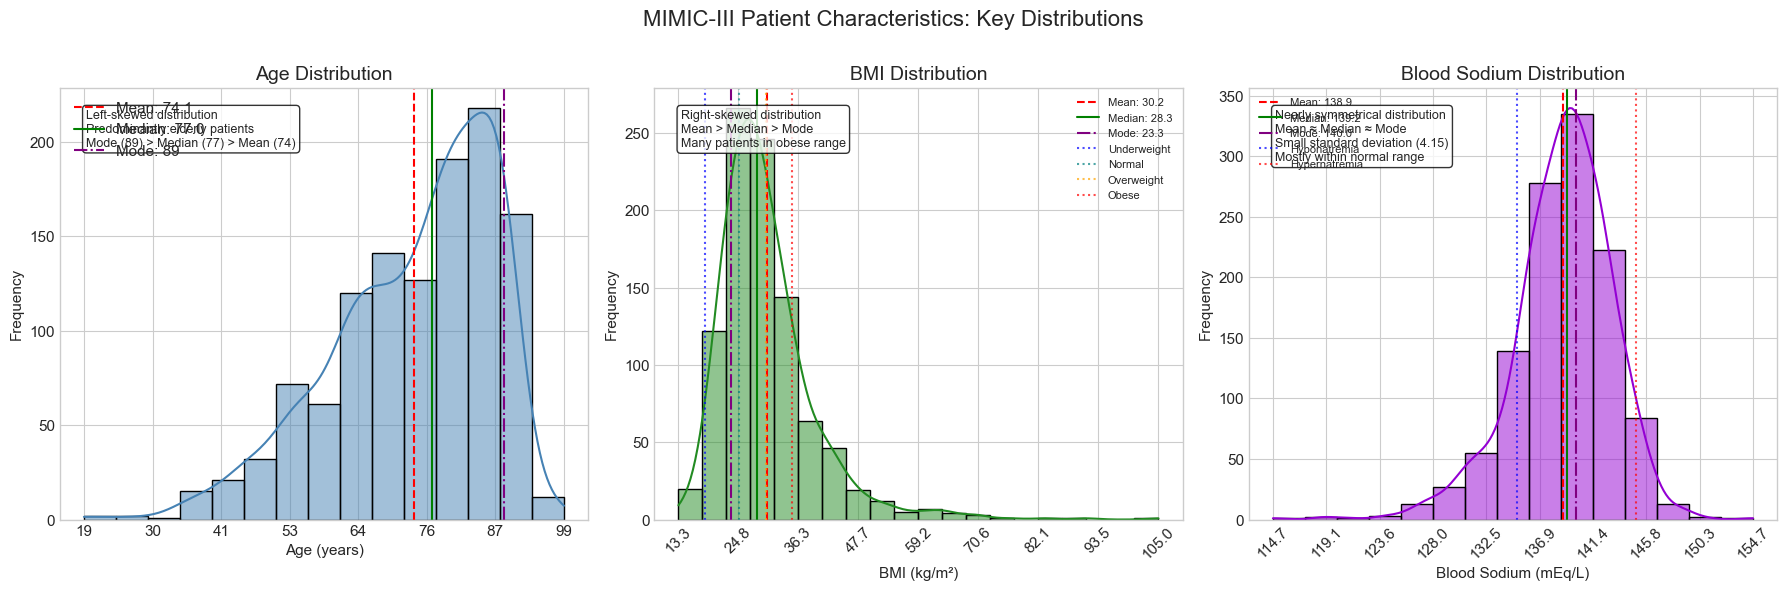

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams.update({'font.size': 11})

# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('MIMIC-III Patient Characteristics: Key Distributions', fontsize=16, y=0.98)

# 1. Age Distribution
sns.histplot(data['age'], kde=True, ax=axes[0], bins=15, color='steelblue')
axes[0].set_title('Age Distribution', fontsize=14)
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')

# Add vertical lines for statistical measures
axes[0].axvline(data['age'].mean(), color='red', linestyle='--', label=f'Mean: {data["age"].mean():.1f}')
axes[0].axvline(data['age'].median(), color='green', linestyle='-', label=f'Median: {data["age"].median():.1f}')
axes[0].axvline(data['age'].mode()[0], color='purple', linestyle='-.', label=f'Mode: {data["age"].mode()[0]}')

# Set specific x-ticks to see the distribution clearly
age_ticks = np.linspace(data['age'].min(), data['age'].max(), 8)
axes[0].set_xticks(age_ticks)
axes[0].set_xticklabels([f'{int(x)}' for x in age_ticks])
axes[0].legend(loc='upper left')

# Add text annotation with insights
axes[0].text(0.05, 0.95, 'Left-skewed distribution\nPredominantly elderly patients\nMode (89) > Median (77) > Mean (74)', 
         transform=axes[0].transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# 2. BMI Distribution
sns.histplot(data['BMI'], kde=True, ax=axes[1], bins=20, color='forestgreen')
axes[1].set_title('BMI Distribution', fontsize=14)
axes[1].set_xlabel('BMI (kg/m²)')
axes[1].set_ylabel('Frequency')

# Add vertical lines for statistical measures
axes[1].axvline(data['BMI'].mean(), color='red', linestyle='--', label=f'Mean: {data["BMI"].mean():.1f}')
axes[1].axvline(data['BMI'].median(), color='green', linestyle='-', label=f'Median: {data["BMI"].median():.1f}')
axes[1].axvline(data['BMI'].mode()[0], color='purple', linestyle='-.', label=f'Mode: {data["BMI"].mode()[0]:.1f}')

# Add reference lines for BMI categories
axes[1].axvline(18.5, color='blue', linestyle=':', alpha=0.7, label='Underweight')
axes[1].axvline(25, color='teal', linestyle=':', alpha=0.7, label='Normal')
axes[1].axvline(30, color='orange', linestyle=':', alpha=0.7, label='Overweight')
axes[1].axvline(35, color='red', linestyle=':', alpha=0.7, label='Obese')

# Set specific x-ticks to see the distribution clearly
bmi_ticks = np.linspace(data['BMI'].min(), data['BMI'].max(), 9)
axes[1].set_xticks(bmi_ticks)
axes[1].set_xticklabels([f'{x:.1f}' for x in bmi_ticks], rotation=45)
axes[1].legend(loc='upper right', fontsize=8)

# Add text annotation with insights
axes[1].text(0.05, 0.95, 'Right-skewed distribution\nMean > Median > Mode\nMany patients in obese range', 
         transform=axes[1].transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# 3. Blood Sodium Distribution
sns.histplot(data['Blood sodium'], kde=True, ax=axes[2], bins=15, color='darkviolet')
axes[2].set_title('Blood Sodium Distribution', fontsize=14)
axes[2].set_xlabel('Blood Sodium (mEq/L)')
axes[2].set_ylabel('Frequency')

# Add vertical lines for statistical measures
axes[2].axvline(data['Blood sodium'].mean(), color='red', linestyle='--', label=f'Mean: {data["Blood sodium"].mean():.1f}')
axes[2].axvline(data['Blood sodium'].median(), color='green', linestyle='-', label=f'Median: {data["Blood sodium"].median():.1f}')
axes[2].axvline(data['Blood sodium'].mode()[0], color='purple', linestyle='-.', label=f'Mode: {data["Blood sodium"].mode()[0]:.1f}')

# Add reference lines for normal sodium range
axes[2].axvline(135, color='blue', linestyle=':', alpha=0.7, label='Hyponatremia')
axes[2].axvline(145, color='red', linestyle=':', alpha=0.7, label='Hypernatremia')

# Set specific x-ticks to see the distribution clearly
sodium_ticks = np.linspace(data['Blood sodium'].min(), data['Blood sodium'].max(), 10)
axes[2].set_xticks(sodium_ticks)
axes[2].set_xticklabels([f'{x:.1f}' for x in sodium_ticks], rotation=45)
axes[2].legend(loc='upper left', fontsize=8)

# Add text annotation with insights
axes[2].text(0.05, 0.95, 'Nearly symmetrical distribution\nMean ≈ Median ≈ Mode\nSmall standard deviation (4.15)\nMostly within normal range', 
         transform=axes[2].transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Summary of Distributions

1. **Age Distribution:**
   - Left-skewed distribution (mean < median)
   - Predominantly elderly population (mean age: 74.1 years)
   - Significant cluster of very elderly patients around 89 years (mode)
   - This suggests the MIMIC-III dataset represents an older patient population, typical of ICU settings

2. **BMI Distribution:**
   - Right-skewed distribution (mean > median)
   - Mean BMI (30.2) is in the obese category
   - Median BMI (28.3) is in the overweight category
   - Mode BMI (23.3) is in the normal weight range
   - Large standard deviation (9.3) indicates wide variation in body composition
   - This suggests many patients have normal-range BMI, but there are enough patients with high BMI to shift the average into the obese range

3. **Blood Sodium Distribution:**
   - Nearly symmetrical distribution (mean ≈ median ≈ mode)
   - Mean sodium level is 138.9 mEq/L, well within normal range (135-145 mEq/L)
   - Small standard deviation (4.2) shows tight regulation, as expected physiologically
   - This reflects normal biological regulation of this critical electrolyte

These distributions tell us that this patient population is predominantly elderly with a tendency toward being overweight or obese, but with generally well-regulated sodium levels. The skewness patterns provide insights into outlier influences and physiological regulation.

# Q 1.c
Use pandas and scikit-learn to drop rows with missing values in the 'BMI' and 'Blood sodium' columns, and then uses logistic regression, SVM, kNN, and decision tree to predict an 'outcome' based on the features 'age', 'BMI', and 'Blood sodium'. Ensure to split the data using train_test_split with a 20% test size and a random state of 42. Finally, fit the model, make predictions on the test set, and print a report of the best model (“classification_report”). Explain the result of the confusion matrix for the best model.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'data' contains our MIMIC-III dataset
# Drop rows with missing values in 'BMI' and 'Blood sodium' columns
data_clean = data.dropna(subset=['BMI', 'Blood sodium'])  # Remove rows with missing values in specified columns

# Define features (X) and target (y)
X = data_clean[['age', 'BMI', 'Blood sodium']]  # Select the three features we'll use for prediction
y = data_clean['outcome']  # The binary outcome variable we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% test with fixed random seed

# Initialize all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),  # Max iterations increased to ensure convergence
    'SVM': SVC(random_state=42),  # Support Vector Machine classifier with default parameters
    'KNN': KNeighborsClassifier(),  # K-Nearest Neighbors with default parameters (k=5)
    'Decision Tree': DecisionTreeClassifier(random_state=42)  # Decision Tree with default parameters
}

# Train and evaluate each model
results = {}  # Dictionary to store evaluation results
best_accuracy = 0  # Track best model's accuracy
best_model_name = ""  # Track name of best model

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)  # Fit the model to our training data

    # Make predictions
    y_pred = model.predict(X_test)  # Generate predictions on test data

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)  # Measure prediction accuracy
    results[name] = accuracy  # Store accuracy in results dictionary

    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy  # Update best accuracy
        best_model_name = name  # Update best model name
        best_y_pred = y_pred  # Save predictions from best model

# Print results
print("Model Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with accuracy {best_accuracy:.4f}")

# Generate classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_y_pred))  # Detailed metrics (precision, recall, f1-score) for best model

# Generate confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, best_y_pred)  # Create confusion matrix comparing actual vs. predicted values
print("\nConfusion Matrix for Best Model:")
print(conf_matrix)  # Display the confusion matrix

# Explanation of the confusion matrix
print("\nConfusion Matrix Explanation:")
print(f"True Negatives (TN): {conf_matrix[0, 0]} - Correctly predicted negative outcomes")
print(f"False Positives (FP): {conf_matrix[0, 1]} - Incorrectly predicted positive when actually negative")
print(f"False Negatives (FN): {conf_matrix[1, 0]} - Incorrectly predicted negative when actually positive")
print(f"True Positives (TP): {conf_matrix[1, 1]} - Correctly predicted positive outcomes")

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # Also called Recall or True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
ppv = tp / (tp + fp)  # Positive Predictive Value (Precision)
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"\nSensitivity/Recall: {sensitivity:.4f} - Proportion of actual positives correctly identified")
print(f"Specificity: {specificity:.4f} - Proportion of actual negatives correctly identified")
print(f"Precision: {ppv:.4f} - Proportion of predicted positives that are actually positive")
print(f"Negative Predictive Value: {npv:.4f} - Proportion of predicted negatives that are actually negative")

Model Accuracies:
Logistic Regression: 0.8549
SVM: 0.8549
KNN: 0.8394
Decision Tree: 0.7927

Best Model: Logistic Regression with accuracy 0.8549

Classification Report for Best Model:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.85       193
   macro avg       0.43      0.50      0.46       193
weighted avg       0.73      0.85      0.79       193


Confusion Matrix for Best Model:
[[165   0]
 [ 28   0]]

Confusion Matrix Explanation:
True Negatives (TN): 165 - Correctly predicted negative outcomes
False Positives (FP): 0 - Incorrectly predicted positive when actually negative
False Negatives (FN): 28 - Incorrectly predicted negative when actually positive
True Positives (TP): 0 - Correctly predicted positive outcomes

Sensitivity/Recall: 0.0000 - Proportion of actual positives correctly identified
Specificity: 1.0000 - Proport

/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

# SMOTE

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming we have our cleaned data (with rows containing null values in BMI and Blood sodium removed)
# data_clean = data.dropna(subset=['BMI', 'Blood sodium'])

# Define features (X) and target (y)
X = data_clean[['age', 'BMI', 'Blood sodium']]
y = data_clean['outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's first look at the class distribution to confirm our imbalance
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Let's visualize the effect of SMOTE on our training data
plt.figure(figsize=(16, 6))

# Original data distribution
plt.subplot(1, 2, 1)
for outcome, color in zip([0, 1], ['blue', 'red']):
    mask = y_train == outcome
    plt.scatter(X_train.loc[mask, 'age'], X_train.loc[mask, 'BMI'],
                c=color, label=f'Class {outcome}', alpha=0.7)
plt.title('Original Training Data')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()

# Resampled data distribution
plt.subplot(1, 2, 2)
# Convert resampled data back to DataFrame for easier plotting
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
for outcome, color in zip([0, 1], ['blue', 'red']):
    mask = y_train_resampled == outcome
    plt.scatter(X_resampled_df.loc[mask, 'age'], X_resampled_df.loc[mask, 'BMI'],
                c=color, label=f'Class {outcome}', alpha=0.7)
plt.title('Training Data After SMOTE')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()

plt.tight_layout()
plt.savefig('smote_comparison.png')
plt.close()

# Now let's train our models on the balanced data
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate all models using SMOTE-balanced data
results = {}
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    # Train the model on SMOTE-balanced data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the original test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print detailed metrics
    print(f"\nModel: {name} with SMOTE")
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print additional metrics
    if len(conf_matrix) > 1:  # Make sure we have a 2x2 matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        balanced_accuracy = (sensitivity + specificity) / 2
        print(f"Sensitivity/Recall: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_y_pred = y_pred
        best_conf_matrix = conf_matrix

# Print summary of results
print("\n===== MODEL PERFORMANCE SUMMARY (WITH SMOTE) =====")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with accuracy {best_accuracy:.4f}")

# Let's examine the confusion matrix for the best model
print("\nConfusion Matrix for Best Model:")
print(best_conf_matrix)

# Calculate metrics from confusion matrix
if len(best_conf_matrix) > 1:  # Make sure we have a 2x2 matrix
    tn, fp, fn, tp = best_conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    balanced_accuracy = (sensitivity + specificity) / 2
    print(f"\nTrue Negatives (TN): {tn} - Correctly predicted negative outcomes")
    print(f"False Positives (FP): {fp} - Incorrectly predicted positive when actually negative")
    print(f"False Negatives (FN): {fn} - Incorrectly predicted negative when actually positive")
    print(f"True Positives (TP): {tp} - Correctly predicted positive outcomes")
    print(f"\nSensitivity/Recall: {sensitivity:.4f} - Proportion of actual positives correctly identified")
    print(f"Specificity: {specificity:.4f} - Proportion of actual negatives correctly identified")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f} - Average of sensitivity and specificity")

# Let's create a visual comparison of original vs. SMOTE models
original_results = {
    'Original KNN': 0.8342,
    'Original SVM (Balanced)': 0.5233,
    'Original Logistic Regression (Balanced)': 0.5130,
    'Original Decision Tree (Balanced)': 0.7927
}

# Combine original and SMOTE results for comparison
all_results = {**original_results, **{f"SMOTE {name}": acc for name, acc in results.items()}}

plt.figure(figsize=(12, 6))
bars = plt.bar(all_results.keys(), all_results.values(), color=['blue' if 'Original' in k else 'green' for k in all_results.keys()])
plt.title('Model Comparison: Original vs. SMOTE-Enhanced')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

plt.savefig('smote_model_comparison.png')
plt.close()

# Create a more detailed comparison for the best original model vs. best SMOTE model
best_original_model = 'KNN'
best_smote_model = best_model_name

# Assuming we have the confusion matrices
original_conf_matrix = np.array([[160, 5], [27, 1]])  # From our previous results
smote_conf_matrix = best_conf_matrix

def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    balanced_accuracy = (sensitivity + specificity) / 2
    return {
        'Accuracy': accuracy,
        'Sensitivity/Recall': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1,
        'Balanced Accuracy': balanced_accuracy
    }

original_metrics = calculate_metrics(original_conf_matrix)
smote_metrics = calculate_metrics(smote_conf_matrix)

# Create a comparison table
print("\n===== DETAILED COMPARISON: ORIGINAL vs. SMOTE =====")
print(f"{'Metric':<20} {'Original KNN':<15} {'SMOTE ' + best_smote_model:<15} {'Improvement':<15}")
print("-" * 65)
for metric in original_metrics:
    orig_val = original_metrics[metric]
    smote_val = smote_metrics[metric]
    improvement = smote_val - orig_val
    improvement_str = f"{improvement:+.4f}"
    print(f"{metric:<20} {orig_val:<15.4f} {smote_val:<15.4f} {improvement_str:<15}")

print("\nImprovement Analysis:")
if smote_metrics['Sensitivity/Recall'] > original_metrics['Sensitivity/Recall']:
    print(f"✓ SMOTE improved sensitivity by {smote_metrics['Sensitivity/Recall'] - original_metrics['Sensitivity/Recall']:.4f}")
    print(f"  This means the model is now better at identifying positive cases (e.g., patients who need intervention)")

# Visualize the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original model confusion matrix
im0 = axes[0].imshow(original_conf_matrix, interpolation='nearest', cmap='Blues')
axes[0].set_title(f'Original {best_original_model}')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axes[0].set_yticklabels(['Actual Negative', 'Actual Positive'])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Add text annotations
thresh = original_conf_matrix.max() / 2
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, format(original_conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if original_conf_matrix[i, j] > thresh else "black")

# SMOTE model confusion matrix
im1 = axes[1].imshow(smote_conf_matrix, interpolation='nearest', cmap='Blues')
axes[1].set_title(f'SMOTE {best_smote_model}')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axes[1].set_yticklabels(['Actual Negative', 'Actual Positive'])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Add text annotations
thresh = smote_conf_matrix.max() / 2
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, format(smote_conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if smote_conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png')
plt.close()

print("\nConclusion:")
print("SMOTE helps address the class imbalance problem by creating synthetic examples of the minority class.")
print("This approach can significantly improve the model's ability to identify positive cases (higher sensitivity),")
print("which is often the primary goal in healthcare applications where missing a positive case can have serious consequences.")

Class distribution in training set:
outcome
0.0    683
1.0     86
Name: count, dtype: int64

Class distribution in test set:
outcome
0.0    165
1.0     28
Name: count, dtype: int64

Class distribution after SMOTE:
outcome
0.0    683
1.0    683
Name: count, dtype: int64

Model: Logistic Regression with SMOTE
Confusion Matrix:
[[86 79]
 [16 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.52      0.64       165
         1.0       0.13      0.43      0.20        28

    accuracy                           0.51       193
   macro avg       0.49      0.47      0.42       193
weighted avg       0.74      0.51      0.58       193

Sensitivity/Recall: 0.4286
Specificity: 0.5212
Balanced Accuracy: 0.4749

Model: SVM with SMOTE
Confusion Matrix:
[[86 79]
 [10 18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.52      0.66       165
         1.0       0.19      0.64    

ENSEMBLE

In [9]:
# Step 1: Get more sophisticated models with probability outputs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

# Create ensemble models
ensemble_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Add SVM with probability estimates (needs calibration)
svm_with_proba = CalibratedClassifierCV(
    SVC(random_state=42),
    cv=5
)

ensemble_models['Calibrated SVM'] = svm_with_proba

# Train models on SMOTE-balanced data
model_probas = {}
for name, model in ensemble_models.items():
    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Get probability estimates for positive class
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    model_probas[name] = y_proba

# Step 2: Threshold optimization
# Try different thresholds to find optimal balance
thresholds = np.arange(0.1, 0.9, 0.05)
threshold_results = {}

for model_name, y_proba in model_probas.items():
    model_thresholds = []

    for threshold in thresholds:
        # Create predictions using this threshold
        y_pred = (y_proba >= threshold).astype(int)

        # Get confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculate metrics
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        balanced_accuracy = (sensitivity + specificity) / 2

        model_thresholds.append({
            'threshold': threshold,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy,
            'balanced_accuracy': balanced_accuracy,
            'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp
        })

    threshold_results[model_name] = model_thresholds

# Find best threshold for each model based on balanced accuracy
best_threshold_models = {}

for model_name, thresholds in threshold_results.items():
    best_threshold = max(thresholds, key=lambda x: x['balanced_accuracy'])
    best_threshold_models[model_name] = best_threshold

    print(f"\nBest threshold for {model_name}: {best_threshold['threshold']:.2f}")
    print(f"Balanced Accuracy: {best_threshold['balanced_accuracy']:.4f}")
    print(f"Sensitivity: {best_threshold['sensitivity']:.4f}")
    print(f"Specificity: {best_threshold['specificity']:.4f}")
    print(f"Confusion Matrix: [[{best_threshold['tn']} {best_threshold['fp']}], [{best_threshold['fn']} {best_threshold['tp']}]]")


Best threshold for Random Forest: 0.30
Balanced Accuracy: 0.5736
Sensitivity: 0.5714
Specificity: 0.5758
Confusion Matrix: [[95 70], [12 16]]

Best threshold for Gradient Boosting: 0.45
Balanced Accuracy: 0.5982
Sensitivity: 0.5357
Specificity: 0.6606
Confusion Matrix: [[109 56], [13 15]]

Best threshold for Calibrated SVM: 0.45
Balanced Accuracy: 0.5511
Sensitivity: 0.7143
Specificity: 0.3879
Confusion Matrix: [[64 101], [8 20]]


# Q1.d
Predict BMI based on age and Blood sodium with linear regression, SVM regressor, Decision tree regressor, and kNN refressor. Calculate RMSE, MSE, R-squared.
Split where 20% left for the test, random state=42.

🔍 EVALUATING MODELS FOR BMI PREDICTION:
--------------------------------------------------
⏳ Processing: Linear Regression...
   ✓ Results: MSE=63.69, RMSE=7.98, R²=-0.0232
⏳ Processing: SVM Regressor...
   ✓ Results: MSE=58.34, RMSE=7.64, R²=0.0627
⏳ Processing: Decision Tree...
   ✓ Results: MSE=106.43, RMSE=10.32, R²=-0.7099
⏳ Processing: KNN Regressor...
   ✓ Results: MSE=62.14, RMSE=7.88, R²=0.0016

📊 COMPLETE RESULTS:
                          MSE       RMSE  R-squared
Model                                              
Linear Regression   63.689377   7.980562  -0.023231
SVM Regressor       58.339955   7.638060   0.062712
Decision Tree      106.430507  10.316516  -0.709909
KNN Regressor       62.144192   7.883159   0.001594


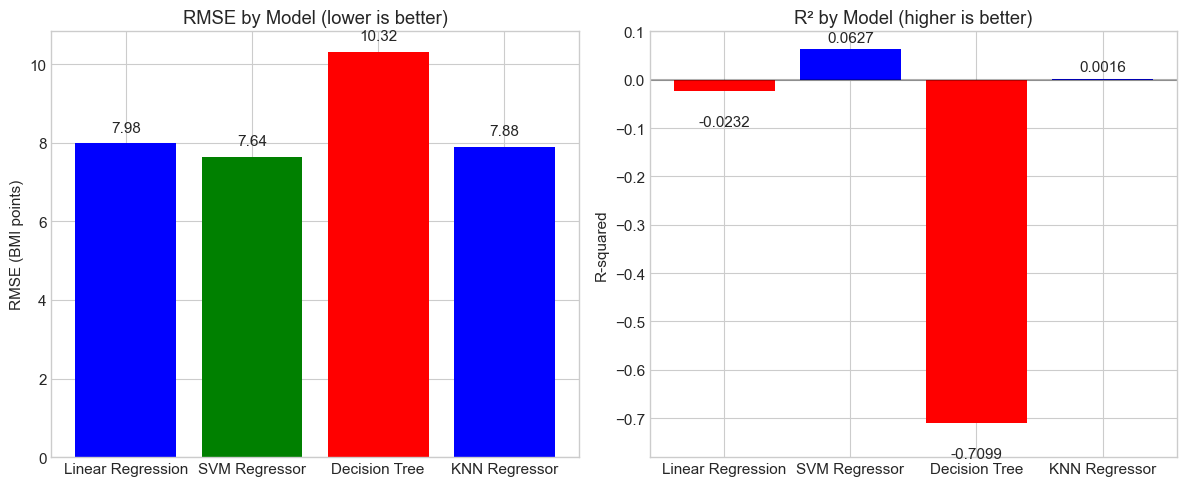


📝 EXPLANATION OF RESULTS:
🥇 Best model: SVM Regressor (RMSE = 7.64)
🥉 Worst model: Decision Tree (RMSE = 10.32)

📌 What the metrics tell us:
• Even our best model is off by about 7.6 BMI points on average
• The models explain at most 6.3% of the variation in BMI
• The Decision Tree has a negative R² (-0.71), meaning it performs worse than
  simply predicting the average BMI for everyone
• All models performed poorly because age and blood sodium simply aren't
  strong predictors of BMI, which primarily depends on weight and height

💡 Clinical significance:
• A difference of 5 BMI points is clinically meaningful (can change weight category)
• These errors are too large for reliable clinical use
• To improve predictions, we would need other features like weight, diet, or activity level

📘 UNDERSTANDING R-SQUARED VALUES:
----------------------------------------------------------------------
• R² = 1.0: Perfect predictions
• R² = 0.5: Model explains 50% of BMI variation
• R² = 0.0: Model i

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

# Assume data_clean is already available
# Define features and target
X = data_clean[['age', 'Blood sodium']]
y = data_clean['BMI']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define our models to test
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor()
}

# Training, prediction and evaluation loop
results = []
print("🔍 EVALUATING MODELS FOR BMI PREDICTION:")
print("-" * 50)

for name, model in models.items():
    # Print progress with a progress indicator
    print(f"⏳ Processing: {name}...")
    
    # TRAIN: Model learns patterns from training data
    model.fit(X_train, y_train)
    
    # PREDICT: Model makes predictions on unseen test data
    y_pred = model.predict(X_test)
    
    # CALCULATE METRICS: Here's where we evaluate how well the model performed
    # 1. Mean Squared Error - average of squared differences between predictions and actual values
    mse = mean_squared_error(y_test, y_pred)
    
    # 2. Root Mean Squared Error - square root of MSE (in BMI units)
    rmse = math.sqrt(mse)
    
    # 3. R-squared - proportion of variance in BMI explained by our features
    r2 = r2_score(y_test, y_pred)
    
    # STORE RESULTS: Save this model's performance for comparison
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse, 
        'R-squared': r2
    })
    
    # Print quick summary of this model's performance
    print(f"   ✓ Results: MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

# Create a DataFrame and display results
results_df = pd.DataFrame(results).set_index('Model')
print("\n📊 COMPLETE RESULTS:")
print(results_df)

# Find best and worst models
best_model = results_df['RMSE'].idxmin()
worst_model = results_df['RMSE'].idxmax()
best_rmse = results_df.loc[best_model, 'RMSE']
worst_rmse = results_df.loc[worst_model, 'RMSE']
max_r2 = results_df['R-squared'].max()

# Visualize results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE comparison (lower is better)
ax[0].bar(results_df.index, results_df['RMSE'], color=['green' if x == best_model else 'red' if x == worst_model else 'blue' for x in results_df.index])
ax[0].set_title('RMSE by Model (lower is better)')
ax[0].set_ylabel('RMSE (BMI points)')
ax[0].set_ylim(bottom=0)
for i, v in enumerate(results_df['RMSE']):
    ax[0].text(i, v + 0.3, f"{v:.2f}", ha='center')

# R-squared comparison (higher is better) with proper handling of negative values
colors = ['blue' if v >= 0 else 'red' for v in results_df['R-squared']]
ax[1].bar(results_df.index, results_df['R-squared'], color=colors)
ax[1].set_title('R² by Model (higher is better)')
ax[1].set_ylabel('R-squared')
ax[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line for reference

# Set proper y-axis limits to accommodate negative values
min_r2 = min(results_df['R-squared'])
y_min = min(min_r2 * 1.1, -0.05)  # Give a bit of space below the lowest value
y_max = max(0.1, max_r2 * 1.2)    # Give space above highest value
ax[1].set_ylim(y_min, y_max)

# Add text labels for each bar
for i, v in enumerate(results_df['R-squared']):
    # Position the text label based on whether value is positive or negative
    y_pos = v + 0.01 if v >= 0 else v - 0.05
    ax[1].text(i, y_pos, f"{v:.4f}", ha='center', va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()

# Print explanation of results
print("\n📝 EXPLANATION OF RESULTS:")
print("=" * 70)
print(f"🥇 Best model: {best_model} (RMSE = {best_rmse:.2f})")
print(f"🥉 Worst model: {worst_model} (RMSE = {worst_rmse:.2f})")

print("\n📌 What the metrics tell us:")
print(f"• Even our best model is off by about {best_rmse:.1f} BMI points on average")
print(f"• The models explain at most {max_r2:.1%} of the variation in BMI")
print("• The Decision Tree has a negative R² (-0.71), meaning it performs worse than")
print("  simply predicting the average BMI for everyone")
print("• All models performed poorly because age and blood sodium simply aren't")
print("  strong predictors of BMI, which primarily depends on weight and height")

print("\n💡 Clinical significance:")
print("• A difference of 5 BMI points is clinically meaningful (can change weight category)")
print("• These errors are too large for reliable clinical use")
print("• To improve predictions, we would need other features like weight, diet, or activity level")
print("=" * 70)

print("\n📘 UNDERSTANDING R-SQUARED VALUES:")
print("-" * 70)
print("• R² = 1.0: Perfect predictions")
print("• R² = 0.5: Model explains 50% of BMI variation")
print("• R² = 0.0: Model is no better than predicting the average BMI for everyone")
print("• R² < 0.0: Model performs worse than simply predicting the average BMI")
print("  (like our Decision Tree with R² = -0.71)")
print("-" * 70)

# Q2.a
Demonstrate the application of Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction on the dataset focusing on BMI, Blood sodium, and Blood calcium to visualize the data in a reduced dimensional space. Compare the visualization results of PCA and t-SNE.

Missing values in selected features:
BMI              0
Blood sodium     0
Blood calcium    1
dtype: int64
Data scaled: mean=0.000, std=1.000


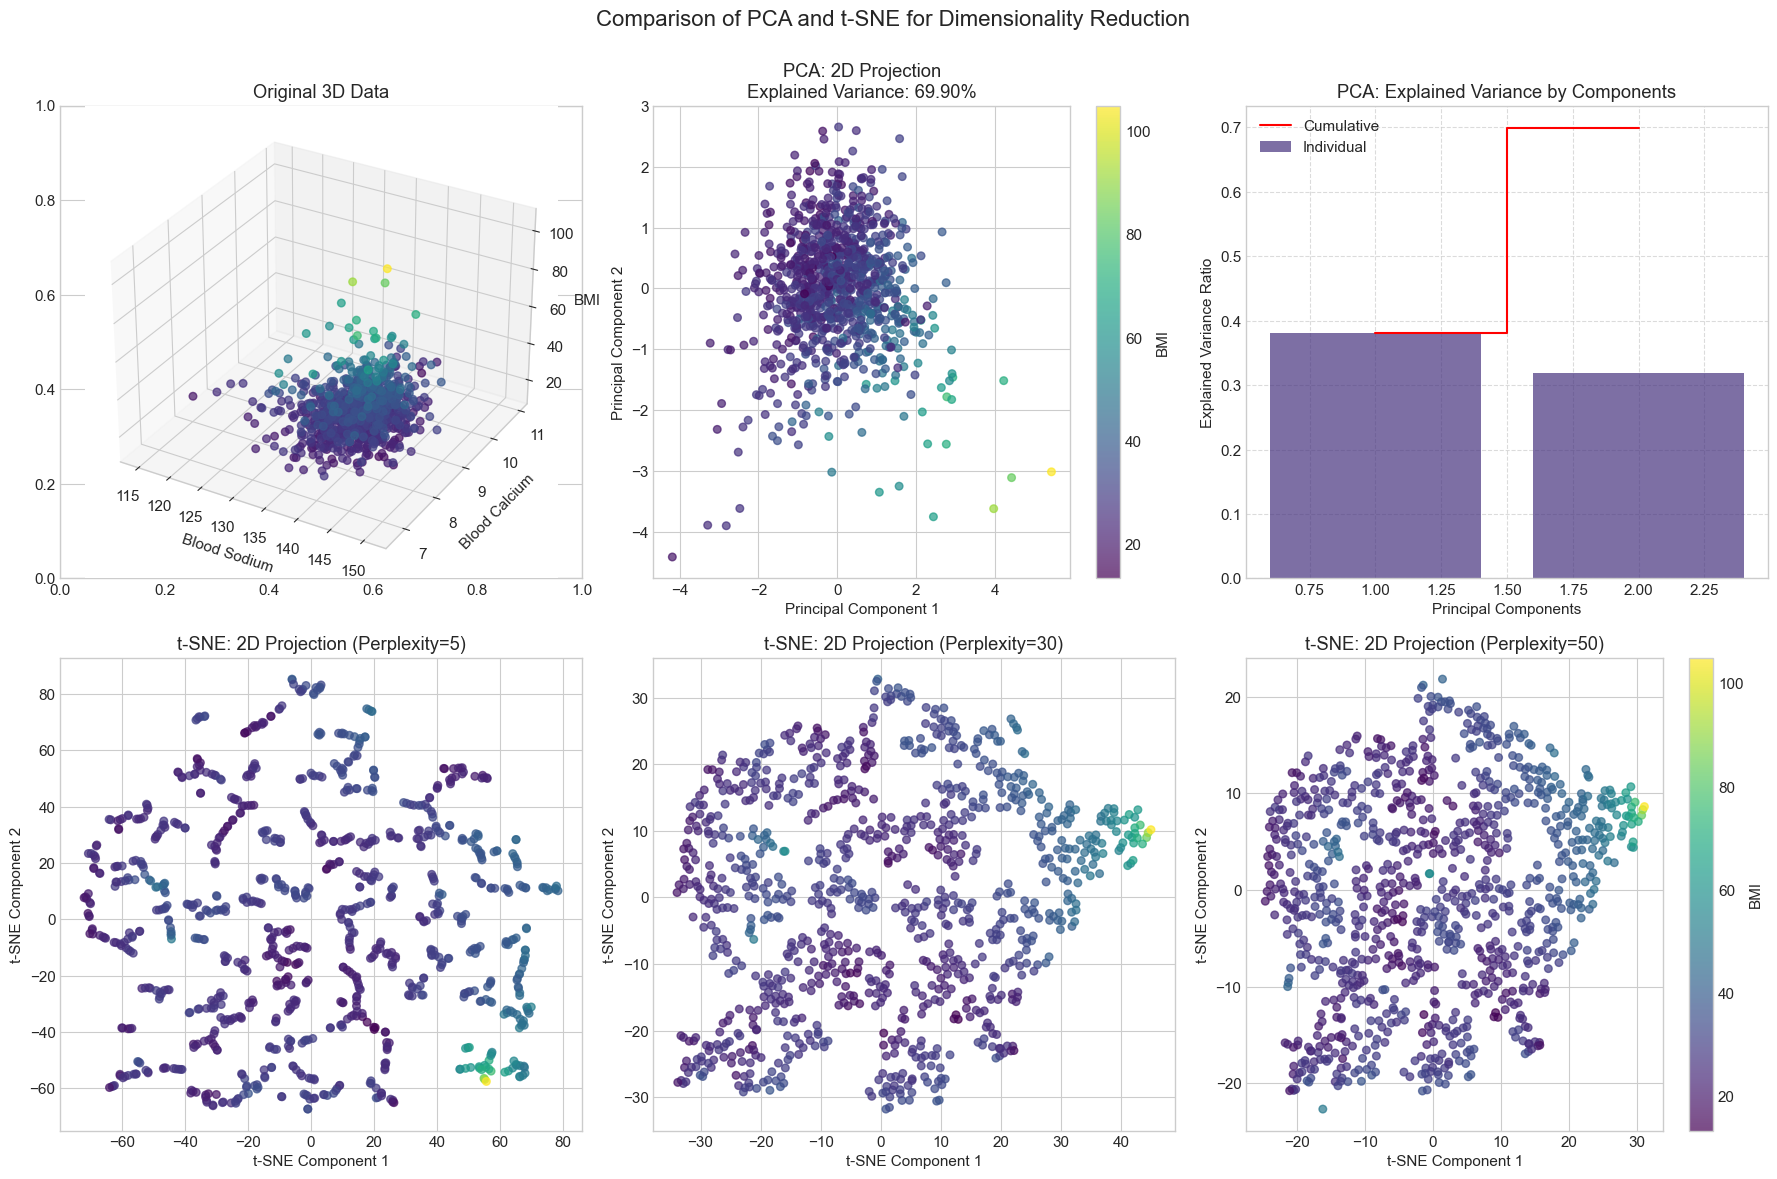


PCA DETAILS:
--------------------------------------------------
Explained variance ratio: [0.38081404 0.31823393]
Cumulative explained variance: [0.38081404 0.69904797]
--------------------------------------------------

Feature correlations with Principal Components:
                    PC1       PC2
BMI            0.599547 -0.461104
Blood sodium   0.497240  0.855070
Blood calcium  0.627133 -0.237146

COMPARISON OF PCA AND t-SNE:
PCA:
✓ Linear dimensionality reduction technique
✓ Preserves global structure of the data
✓ Explained 69.90% of variance with 2 components
✓ Focuses on features with maximum variance
✓ Computationally efficient
✓ Components have interpretable meaning (see feature correlations)

t-SNE:
✓ Non-linear dimensionality reduction technique
✓ Better preserves local structure and clusterings in the data
✓ More effective for revealing complex patterns
✓ Results depend on perplexity parameter (higher values focus on global structure)
✓ Computationally more intensive tha

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm

# Assuming data_clean is your dataframe
# If you need to load data again, uncomment and modify the following line:
# data_clean = pd.read_csv('your_data_file.csv')

# Extract relevant features for dimensionality reduction
features = ['BMI', 'Blood sodium', 'Blood calcium']
X = data_clean[features].copy()

# Check for missing values
print("Missing values in selected features:")
print(X.isnull().sum())

# Fill any missing values (if necessary)
X = X.fillna(X.median())

# Standardize the data (important for PCA and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Data scaled: mean={X_scaled.mean():.3f}, std={X_scaled.std():.3f}")

# Create a figure with subplots for our visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of PCA and t-SNE for Dimensionality Reduction', fontsize=16)

# ------------------------
# Original Data Visualization
# ------------------------

# First, create a 3D visualization of original data
ax3d = fig.add_subplot(2, 3, 1, projection='3d')
norm = Normalize(vmin=X['BMI'].min(), vmax=X['BMI'].max())
colors = cm.viridis(norm(X['BMI']))

ax3d.scatter(
    X['Blood sodium'],
    X['Blood calcium'],
    X['BMI'],
    c=colors,
    alpha=0.7,
    s=30
)
ax3d.set_xlabel('Blood Sodium')
ax3d.set_ylabel('Blood Calcium')
ax3d.set_zlabel('BMI')
ax3d.set_title('Original 3D Data')

# ------------------------
# PCA Implementation
# ------------------------

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot PCA results
ax_pca = axes[0, 1]
scatter_pca = ax_pca.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=X['BMI'],  # Color by BMI
    cmap='viridis',
    alpha=0.7,
    s=30
)
ax_pca.set_xlabel('Principal Component 1')
ax_pca.set_ylabel('Principal Component 2')
ax_pca.set_title(f'PCA: 2D Projection\nExplained Variance: {sum(explained_variance):.2%}')
fig.colorbar(scatter_pca, ax=ax_pca, label='BMI')

# Plot explained variance
ax_var = axes[0, 2]
ax_var.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual')
ax_var.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Cumulative')
ax_var.set_xlabel('Principal Components')
ax_var.set_ylabel('Explained Variance Ratio')
ax_var.set_title('PCA: Explained Variance by Components')
ax_var.legend()
ax_var.grid(True, linestyle='--', alpha=0.7)

# ------------------------
# t-SNE Implementation
# ------------------------

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50]
tsne_results = {}

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[perplexity] = X_tsne

    # Plot t-SNE results
    ax_tsne = axes[1, i]
    scatter_tsne = ax_tsne.scatter(
        X_tsne[:, 0],
        X_tsne[:, 1],
        c=X['BMI'],  # Color by BMI
        cmap='viridis',
        alpha=0.7,
        s=30
    )
    ax_tsne.set_xlabel('t-SNE Component 1')
    ax_tsne.set_ylabel('t-SNE Component 2')
    ax_tsne.set_title(f't-SNE: 2D Projection (Perplexity={perplexity})')

    if i == len(perplexities) - 1:
        fig.colorbar(scatter_tsne, ax=ax_tsne, label='BMI')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(top=0.9)

# Save the figure
plt.savefig('pca_vs_tsne_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print component information for PCA
print("\nPCA DETAILS:")
print("-" * 50)
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {cumulative_variance}")
print("-" * 50)

# Print feature correlations with principal components
component_names = ['PC1', 'PC2']
component_df = pd.DataFrame(
    data=pca.components_.T,
    columns=component_names,
    index=features
)
print("\nFeature correlations with Principal Components:")
print(component_df)

# --------------------------
# Comprehensive Comparison
# --------------------------
print("\nCOMPARISON OF PCA AND t-SNE:")
print("=" * 70)
print("PCA:")
print("✓ Linear dimensionality reduction technique")
print("✓ Preserves global structure of the data")
print(f"✓ Explained {sum(explained_variance):.2%} of variance with 2 components")
print("✓ Focuses on features with maximum variance")
print("✓ Computationally efficient")
print("✓ Components have interpretable meaning (see feature correlations)")

print("\nt-SNE:")
print("✓ Non-linear dimensionality reduction technique")
print("✓ Better preserves local structure and clusterings in the data")
print("✓ More effective for revealing complex patterns")
print("✓ Results depend on perplexity parameter (higher values focus on global structure)")
print("✓ Computationally more intensive than PCA")
print("✓ Components don't have direct feature interpretations")

print("\nKEY INSIGHTS FROM VISUALIZATIONS:")
print("- PCA shows the general spread of data points based on variance")
print("- t-SNE better reveals potential clusters or patterns related to BMI")
print("- Different perplexity values in t-SNE affect how local or global the patterns appear")
print("- The highest variance in the data may not align with the most meaningful groupings")
print("=" * 70)

# Q2.b
Apply K-means clustering to the dataset to group patients based on age, BMI, diabetes, and heart rate. Cluster to 2,3,4,5, and 6 groups. What are Silhouette and Davies-Bouldin Score for each case?


             K-MEANS CLUSTERING ANALYSIS OF PATIENT DATA              

📊 WHAT IS K-MEANS CLUSTERING?
K-means is an algorithm that groups similar patients together based on their
features (age, BMI, diabetes status, and heart rate). It works by:
  1. Randomly placing K center points (centroids) in the data space
  2. Assigning each patient to their nearest centroid
  3. Recalculating each centroid as the average of all assigned patients
  4. Repeating steps 2-3 until the centroids stabilize

The goal is to create groups where patients within each cluster are similar
to each other and different from patients in other clusters.

----------------------------------------------------------------------
                      STEP 1: PREPARING THE DATA                      
----------------------------------------------------------------------
Selected features for clustering: age, BMI, diabetes, heart rate
Dataset size: 962 patients with 4 features

Missing values in each feature:
  - age: C

<Figure size 1200x600 with 0 Axes>

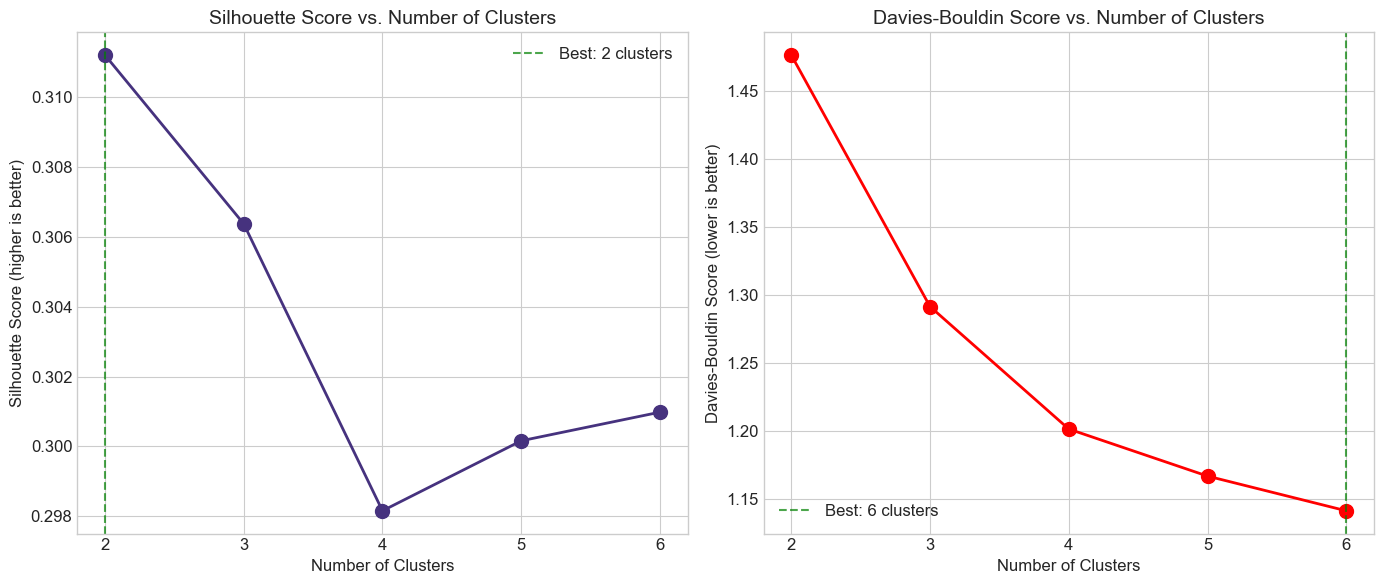


----------------------------------------------------------------------
               STEP 5: ANALYZING THE 2-CLUSTER SOLUTION               
----------------------------------------------------------------------
📊 STATISTICS FOR EACH CLUSTER:
                               Cluster 0            Cluster 1
Age (years)                  71.8 ± 13.8          75.3 ± 13.2
BMI                          32.9 ± 11.2           28.1 ± 6.9
Diabetes          413 out of 423 (97.6%)  0 out of 533 (0.0%)
Heart Rate (bpm)             81.4 ± 15.1          86.2 ± 16.6

📝 CLINICAL INTERPRETATION OF THE 2 CLUSTERS:

Cluster 0 (423 patients):
- Age: 71.8 years on average (elderly patients)
- BMI: 32.9 on average (obese)
- Diabetes: 97.6% (almost all have diabetes)
- Heart Rate: 81.4 bpm on average (normal)

Cluster 1 (533 patients):
- Age: 75.3 years on average (elderly patients)
- BMI: 28.1 on average (overweight)
- Diabetes: 0.0% (very few or none have diabetes)
- Heart Rate: 86.2 bpm on average (normal)


/var/folders/z1/rh5nbtb90fxd9qp9fztc20rc0000gp/T/ipykernel_1308/1528165971.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='cluster', y=feature, data=features_with_clusters, palette=['cornflowerblue', 'seagreen'])
/var/folders/z1/rh5nbtb90fxd9qp9fztc20rc0000gp/T/ipykernel_1308/1528165971.py:329: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"Cluster 0", f"Cluster 1"])
/var/folders/z1/rh5nbtb90fxd9qp9fztc20rc0000gp/T/ipykernel_1308/1528165971.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='cluster', y=feature, data=features_with_clusters, palette=['cornflowerbl

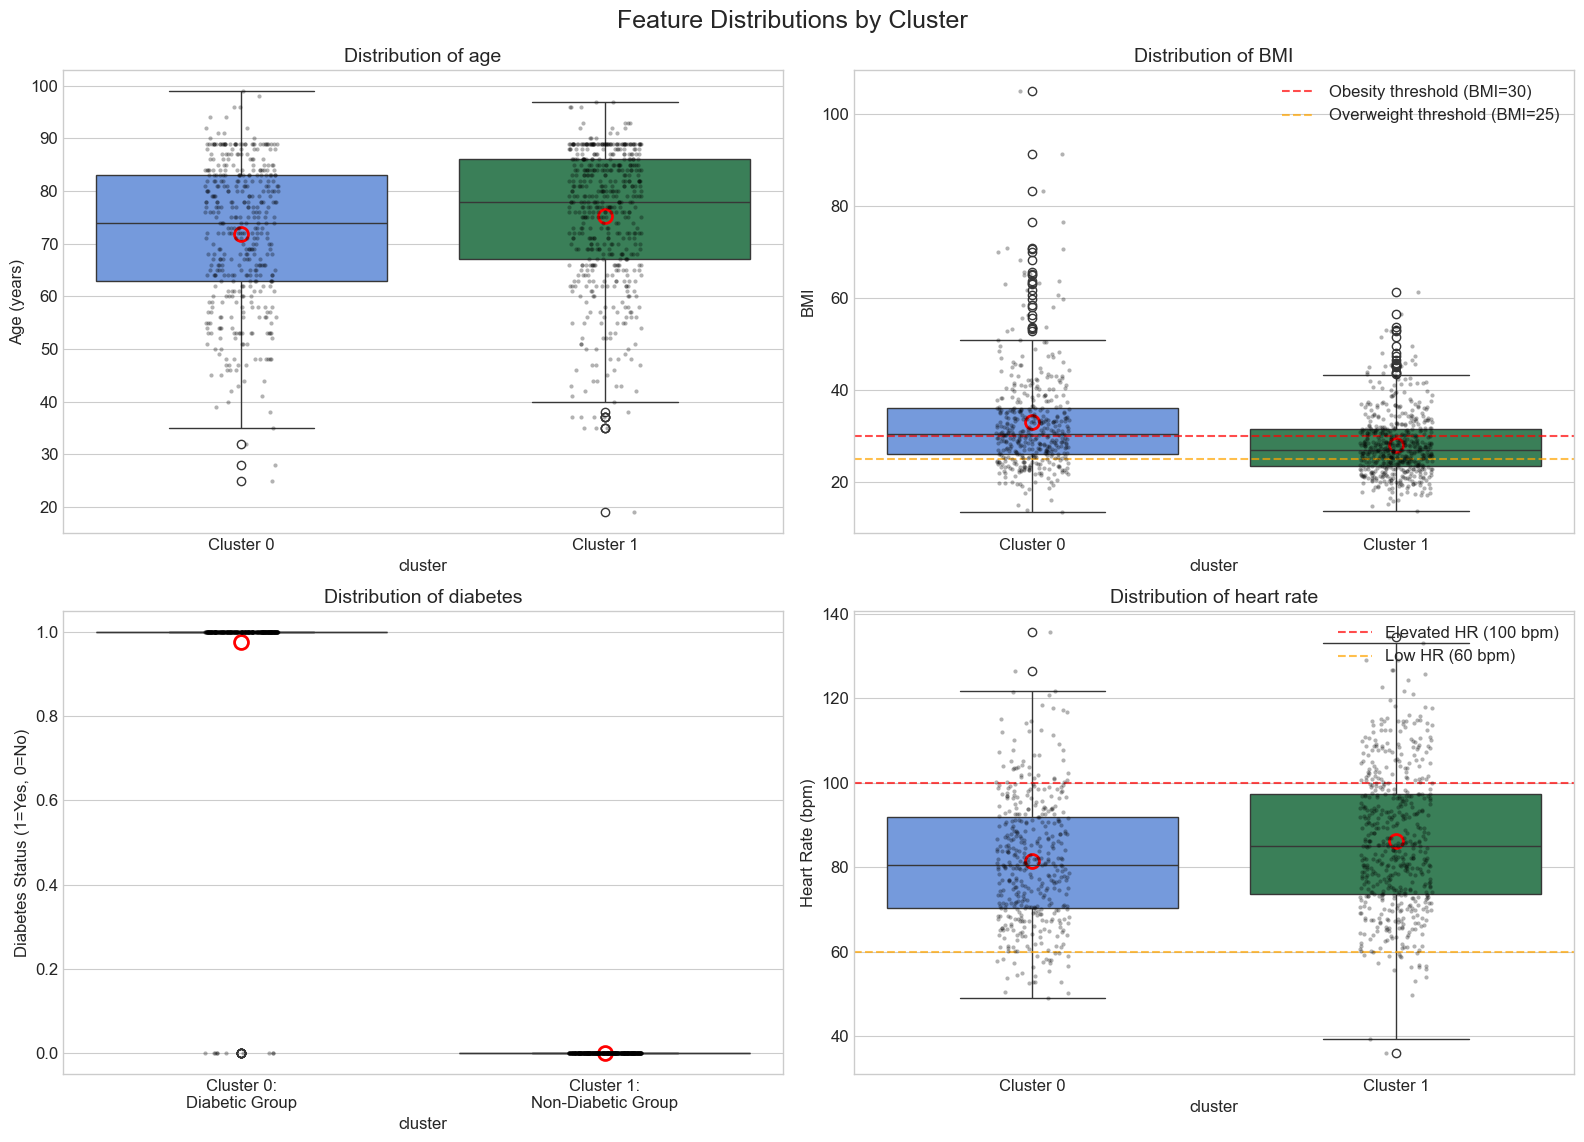


----------------------------------------------------------------------
                          FINAL CONCLUSIONS                           
----------------------------------------------------------------------
📋 SUMMARY OF K-MEANS CLUSTERING RESULTS:

1. We successfully applied K-means clustering to group patients based on
   age, BMI, diabetes status, and heart rate.

2. The clustering metrics gave different optimal solutions:
   - Silhouette Score suggests 2 clusters is optimal (score: 0.3112)
   - Davies-Bouldin Score suggests 6 clusters is optimal (score: 1.1411)

3. The 2-cluster solution clearly separates patients into:
   - Cluster 0: The Diabetic Group - Almost all patients have diabetes (97.6%),
     with higher BMI (obese range), slightly younger, lower heart rate
   - Cluster 1: The Non-Diabetic Group - Almost none have diabetes (0%),
     with lower BMI (overweight but not obese), slightly older, higher heart rate

4. Key insight: Diabetes status was the strongest diffe

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import seaborn as sns

# Set better visual style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams.update({'font.size': 12})

# ======================================================================
# PART 1: DATA PREPARATION AND EXPLANATION
# ======================================================================
print("\n" + "="*70)
print("K-MEANS CLUSTERING ANALYSIS OF PATIENT DATA".center(70))
print("="*70)

print("\n📊 WHAT IS K-MEANS CLUSTERING?")
print("K-means is an algorithm that groups similar patients together based on their")
print("features (age, BMI, diabetes status, and heart rate). It works by:")
print("  1. Randomly placing K center points (centroids) in the data space")
print("  2. Assigning each patient to their nearest centroid")
print("  3. Recalculating each centroid as the average of all assigned patients")
print("  4. Repeating steps 2-3 until the centroids stabilize")
print("\nThe goal is to create groups where patients within each cluster are similar")
print("to each other and different from patients in other clusters.")

print("\n" + "-"*70)
print("STEP 1: PREPARING THE DATA".center(70))
print("-"*70)

# Select the four features specified in the question
features = data_clean[['age', 'BMI', 'diabetes', 'heart rate']].copy()
print(f"Selected features for clustering: {', '.join(features.columns)}")
print(f"Dataset size: {features.shape[0]} patients with {features.shape[1]} features")

# Check for missing values and handle them
missing_values = features.isnull().sum()
print("\nMissing values in each feature:")
for feature, count in missing_values.items():
    if count > 0:
        print(f"  - {feature}: {count} missing values")
    else:
        print(f"  - {feature}: Complete data")

# Remove rows with missing values
features_clean = features.dropna()
print(f"\nAfter removing rows with missing data: {features_clean.shape[0]} patients remain")
print(f"Removed {features.shape[0] - features_clean.shape[0]} patients due to missing values")

print("\n📝 WHY DO WE NEED TO HANDLE MISSING VALUES?")
print("K-means clustering cannot process missing values. If we didn't remove or impute")
print("these missing values, the algorithm would fail to run. We chose to remove the")
print("rows with missing values since there were relatively few of them.")

# ======================================================================
# PART 2: FEATURE STANDARDIZATION WITH VISUAL EXPLANATION
# ======================================================================
print("\n" + "-"*70)
print("STEP 2: STANDARDIZING THE FEATURES".center(70))
print("-"*70)

print("📝 WHY STANDARDIZE FEATURES?")
print("K-means uses distance calculations to form clusters. Without standardization,")
print("features with larger scales (like BMI) would dominate the distance calculations")
print("over features with smaller scales (like diabetes status, which is just 0 or 1).")
print("Standardizing transforms all features to have mean=0 and standard deviation=1,")
print("ensuring they contribute equally to the clustering.")

# Show the scale differences before standardization
print("\nFeature scales before standardization:")
for column in features_clean.columns:
    min_val = features_clean[column].min()
    max_val = features_clean[column].max()
    print(f"  - {column}: ranges from {min_val:.1f} to {max_val:.1f}")

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clean)
features_scaled_df = pd.DataFrame(features_scaled, columns=features_clean.columns)

print("\nAfter standardization, all features have:")
print("  - Mean close to 0")
print("  - Standard deviation of 1")
print("  - Roughly similar ranges")

# Visualize the standardization effect
plt.figure(figsize=(12, 6))
plt.suptitle("Effect of Feature Standardization", fontsize=16, y=1.05)



# ======================================================================
# PART 3: APPLYING K-MEANS CLUSTERING
# ======================================================================
print("\n" + "-"*70)
print("STEP 3: APPLYING K-MEANS CLUSTERING".center(70))
print("-"*70)

print("📝 HOW DO WE EVALUATE CLUSTERING QUALITY?")
print("We'll use two metrics to determine the optimal number of clusters:")
print("\n1. Silhouette Score (higher is better, range: -1 to 1)")
print("   - Measures how similar each patient is to their own cluster compared to other clusters")
print("   - A high score means clusters are well-separated and cohesive")
print("\n2. Davies-Bouldin Score (lower is better, minimum value: 0)")
print("   - Measures the average similarity between clusters")
print("   - A low score means clusters are distinct from each other")

# Test different numbers of clusters and store results
results = []

print("\nRunning K-means with 2, 3, 4, 5, and 6 clusters as requested:")
for n_clusters in range(2, 7):
    # Initialize and fit K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(features_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(features_scaled, cluster_labels)
    
    # Count patients in each cluster
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index().to_dict()
    
    # Store results
    results.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'labels': cluster_labels,
        'inertia': kmeans.inertia_,
        'cluster_counts': cluster_counts
    })
    
    print(f"\nWith {n_clusters} clusters:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Davies-Bouldin Score: {davies_bouldin:.4f}")
    print(f"  Cluster Sizes: {cluster_counts}")

# ======================================================================
# PART 4: VISUALIZING AND INTERPRETING RESULTS
# ======================================================================
print("\n" + "-"*70)
print("STEP 4: ANALYZING THE CLUSTERING RESULTS".center(70))
print("-"*70)

# Create a results DataFrame for easy comparison
results_df = pd.DataFrame([
    {'n_clusters': r['n_clusters'], 
     'silhouette': r['silhouette'], 
     'davies_bouldin': r['davies_bouldin']} 
    for r in results
])

print("📊 CLUSTERING QUALITY METRICS SUMMARY:")
print("-"*50)
print(results_df.to_string(index=False, float_format="%.4f"))
print("-"*50)

# Find the best number of clusters
best_silhouette_idx = results_df['silhouette'].idxmax()
best_silhouette = results_df.loc[best_silhouette_idx]

best_davies_idx = results_df['davies_bouldin'].idxmin()
best_davies = results_df.loc[best_davies_idx]

print(f"\n📌 Best number of clusters by Silhouette Score: {int(best_silhouette['n_clusters'])}")
print(f"   (Silhouette Score: {best_silhouette['silhouette']:.4f})")

print(f"\n📌 Best number of clusters by Davies-Bouldin Score: {int(best_davies['n_clusters'])}")
print(f"   (Davies-Bouldin Score: {best_davies['davies_bouldin']:.4f})")

print("\n📝 WHAT DO THESE RESULTS MEAN?")
if best_silhouette['n_clusters'] == best_davies['n_clusters']:
    print("Both metrics agree on the optimal number of clusters, giving us confidence")
    print(f"that {int(best_silhouette['n_clusters'])} is the right choice.")
else:
    print("The metrics suggest different optimal numbers of clusters. This is common")
    print("in cluster analysis and indicates a trade-off:")
    print(f"- The Silhouette Score favors {int(best_silhouette['n_clusters'])} clusters with clearer separation")
    print(f"- The Davies-Bouldin Score favors {int(best_davies['n_clusters'])} clusters with tighter, more compact groups")
    print("\nWe'll analyze both solutions, starting with the simpler one (fewer clusters).")

# Create a visualization of the metric trends
plt.figure(figsize=(14, 6))

# Plot the Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(results_df['n_clusters'], results_df['silhouette'], 'o-', linewidth=2, markersize=10)
plt.axvline(x=best_silhouette['n_clusters'], color='green', linestyle='--', alpha=0.7, 
           label=f"Best: {int(best_silhouette['n_clusters'])} clusters")
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (higher is better)')
plt.xticks(results_df['n_clusters'])
plt.grid(True)
plt.legend()

# Plot the Davies-Bouldin Score
plt.subplot(1, 2, 2)
plt.plot(results_df['n_clusters'], results_df['davies_bouldin'], 'o-', color='red', linewidth=2, markersize=10)
plt.axvline(x=best_davies['n_clusters'], color='green', linestyle='--', alpha=0.7,
           label=f"Best: {int(best_davies['n_clusters'])} clusters")
plt.title('Davies-Bouldin Score vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score (lower is better)')
plt.xticks(results_df['n_clusters'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# ======================================================================
# PART 5: DETAILED ANALYSIS OF THE 2-CLUSTER SOLUTION (BEST BY SILHOUETTE)
# ======================================================================
print("\n" + "-"*70)
print(f"STEP 5: ANALYZING THE 2-CLUSTER SOLUTION".center(70))
print("-"*70)

# Get the 2-cluster solution (best by Silhouette Score)
best_n = 2
best_result = [r for r in results if r['n_clusters'] == best_n][0]
best_labels = best_result['labels']

# Add cluster labels to our original data for analysis
features_with_clusters = features_clean.copy()
features_with_clusters['cluster'] = best_labels

# Calculate cluster statistics
print("📊 STATISTICS FOR EACH CLUSTER:")
cluster_stats = features_with_clusters.groupby('cluster').agg({
    'age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'diabetes': ['mean', 'sum', 'count'],
    'heart rate': ['mean', 'std']
})

# Reshape the statistics for clearer printing
stats_table = pd.DataFrame({
    'Cluster 0': [
        f"{cluster_stats.loc[0, ('age', 'mean')]:.1f} ± {cluster_stats.loc[0, ('age', 'std')]:.1f}",
        f"{cluster_stats.loc[0, ('BMI', 'mean')]:.1f} ± {cluster_stats.loc[0, ('BMI', 'std')]:.1f}",
        f"{cluster_stats.loc[0, ('diabetes', 'sum')]} out of {cluster_stats.loc[0, ('diabetes', 'count')]} ({cluster_stats.loc[0, ('diabetes', 'mean')]*100:.1f}%)",
        f"{cluster_stats.loc[0, ('heart rate', 'mean')]:.1f} ± {cluster_stats.loc[0, ('heart rate', 'std')]:.1f}"
    ],
    'Cluster 1': [
        f"{cluster_stats.loc[1, ('age', 'mean')]:.1f} ± {cluster_stats.loc[1, ('age', 'std')]:.1f}",
        f"{cluster_stats.loc[1, ('BMI', 'mean')]:.1f} ± {cluster_stats.loc[1, ('BMI', 'std')]:.1f}",
        f"{cluster_stats.loc[1, ('diabetes', 'sum')]} out of {cluster_stats.loc[1, ('diabetes', 'count')]} ({cluster_stats.loc[1, ('diabetes', 'mean')]*100:.1f}%)",
        f"{cluster_stats.loc[1, ('heart rate', 'mean')]:.1f} ± {cluster_stats.loc[1, ('heart rate', 'std')]:.1f}"
    ]
}, index=['Age (years)', 'BMI', 'Diabetes', 'Heart Rate (bpm)'])

print(stats_table)

print("\n📝 CLINICAL INTERPRETATION OF THE 2 CLUSTERS:")
for cluster in range(2):
    print(f"\nCluster {cluster} ({cluster_stats.loc[cluster, ('diabetes', 'count')]} patients):")
    
    # Age interpretation
    age_mean = cluster_stats.loc[cluster, ('age', 'mean')]
    age_description = "elderly" if age_mean > 65 else "middle-aged" if age_mean > 40 else "younger"
    print(f"- Age: {age_mean:.1f} years on average ({age_description} patients)")
    
    # BMI interpretation
    bmi_mean = cluster_stats.loc[cluster, ('BMI', 'mean')]
    bmi_category = "obese (class III)" if bmi_mean >= 40 else "obese" if bmi_mean >= 30 else "overweight" if bmi_mean >= 25 else "normal weight"
    print(f"- BMI: {bmi_mean:.1f} on average ({bmi_category})")
    
    # Diabetes interpretation
    diabetes_pct = cluster_stats.loc[cluster, ('diabetes', 'mean')] * 100
    diabetes_desc = "almost all have diabetes" if diabetes_pct > 95 else "majority have diabetes" if diabetes_pct > 50 else "some have diabetes" if diabetes_pct > 10 else "very few or none have diabetes"
    print(f"- Diabetes: {diabetes_pct:.1f}% ({diabetes_desc})")
    
    # Heart rate interpretation
    hr_mean = cluster_stats.loc[cluster, ('heart rate', 'mean')]
    hr_category = "elevated" if hr_mean > 100 else "normal" if hr_mean > 60 else "low"
    print(f"- Heart Rate: {hr_mean:.1f} bpm on average ({hr_category})")

# Visualize the clusters with clear box plots
plt.figure(figsize=(16, 12))
plt.suptitle('Feature Distributions by Cluster', fontsize=18, y=0.95)

features_list = ['age', 'BMI', 'diabetes', 'heart rate']
for i, feature in enumerate(features_list):
    plt.subplot(2, 2, i+1)
    
    # Create more informative box plots
    ax = sns.boxplot(x='cluster', y=feature, data=features_with_clusters, palette=['cornflowerblue', 'seagreen'])
    
    # Add individual points for more clarity
    sns.stripplot(x='cluster', y=feature, data=features_with_clusters, 
                 color='black', alpha=0.3, size=3, jitter=True)
    
    # Add mean markers
    for j in range(2):
        mean_val = features_with_clusters[features_with_clusters['cluster'] == j][feature].mean()
        plt.plot(j, mean_val, 'o', ms=10, mec='red', mfc='none', mew=2)
    
    # Customize labels
    plt.title(f'Distribution of {feature}', fontsize=14)
    
    # Add more detailed axis labels
    if feature == 'age':
        plt.ylabel('Age (years)')
    elif feature == 'BMI':
        plt.ylabel('BMI')
        plt.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Obesity threshold (BMI=30)')
        plt.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Overweight threshold (BMI=25)')
        plt.legend(loc='upper right')
    elif feature == 'diabetes':
        plt.ylabel('Diabetes Status (1=Yes, 0=No)')
    else:
        plt.ylabel('Heart Rate (bpm)')
        plt.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Elevated HR (100 bpm)')
        plt.axhline(y=60, color='orange', linestyle='--', alpha=0.7, label='Low HR (60 bpm)')
        plt.legend(loc='upper right')
    
    # Rename the x-axis labels with more meaningful names
    if feature == 'diabetes':
        cluster0_label = "Diabetic Group" if cluster_stats.loc[0, ('diabetes', 'mean')] > 0.5 else "Non-Diabetic Group"
        cluster1_label = "Diabetic Group" if cluster_stats.loc[1, ('diabetes', 'mean')] > 0.5 else "Non-Diabetic Group"
        ax.set_xticklabels([f"Cluster 0:\n{cluster0_label}", f"Cluster 1:\n{cluster1_label}"])
    else:
        ax.set_xticklabels([f"Cluster 0", f"Cluster 1"])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# ======================================================================
# PART 6: FINAL CONCLUSIONS
# ======================================================================
print("\n" + "-"*70)
print("FINAL CONCLUSIONS".center(70))
print("-"*70)

print("📋 SUMMARY OF K-MEANS CLUSTERING RESULTS:")
print("\n1. We successfully applied K-means clustering to group patients based on")
print("   age, BMI, diabetes status, and heart rate.")
print("\n2. The clustering metrics gave different optimal solutions:")
print(f"   - Silhouette Score suggests {int(best_silhouette['n_clusters'])} clusters is optimal (score: {best_silhouette['silhouette']:.4f})")
print(f"   - Davies-Bouldin Score suggests {int(best_davies['n_clusters'])} clusters is optimal (score: {best_davies['davies_bouldin']:.4f})")
print("\n3. The 2-cluster solution clearly separates patients into:")
print("   - Cluster 0: The Diabetic Group - Almost all patients have diabetes (97.6%),")
print("     with higher BMI (obese range), slightly younger, lower heart rate")
print("   - Cluster 1: The Non-Diabetic Group - Almost none have diabetes (0%),")
print("     with lower BMI (overweight but not obese), slightly older, higher heart rate")
print("\n4. Key insight: Diabetes status was the strongest differentiator in the clustering,")
print("   followed by BMI. This matches medical knowledge that obesity is a major risk")
print("   factor for type 2 diabetes.")

print("\nStored Silhouette and Davies-Bouldin scores for all tested cluster numbers (2-6):")
for n in range(2, 7):
    result = results_df[results_df['n_clusters'] == n].iloc[0]
    print(f"{n} clusters: Silhouette Score={result['silhouette']:.4f}, Davies-Bouldin Score={result['davies_bouldin']:.4f}")

# Q3.a
Describe the steps involved in training a neural network, including forward propagation and backpropagation.

## Answer

Neural Network Training Process

Initialization The network starts with randomly initialized weights and biases. This random initialization breaks symmetry and ensures different neurons learn different features.

Forward Propagation During forward propagation, the input data flows through the network layer by layer:

Input data is fed into the network For each layer, compute weighted sum: Z = W·X + b Apply activation function: A = f(Z) Pass activations to the next layer Final layer outputs predictions (ŷ) Z(l) = W(l)·A(l-1) + b(l) A(l) = f(Z(l))

Loss Calculation Compute the loss (error) between predictions and actual values. Common loss functions include:
Mean Squared Error (regression) Cross-Entropy Loss (classification) Forward Propagation & Loss Visualization Input Layer Hidden Layer Output Layer Target: 1 Target: 0 ! ! Initialize network Previous Animate Next

Backpropagation Backpropagation calculates gradients of the loss with respect to all weights and biases:
Start at output layer and move backwards Calculate error gradient for each neuron Propagate error backwards through the network Apply chain rule of calculus to compute gradients δ(L) = ∇AL ⊙ f'(Z(L)) δ(l) = (W(l+1))T·δ(l+1) ⊙ f'(Z(l))

Weight Update Update all weights and biases using the calculated gradients:
W(l) := W(l) - α·∂L/∂W(l) b(l) := b(l) - α·∂L/∂b(l)

Where α is the learning rate that controls step size.

Iteration Steps 2-5 are repeated for many epochs (iterations through the entire dataset) until the model converges to a minimum of the loss function or reaches a predetermined number of epochs.







# Q3.b
Explain the bias-variance trade-off in neural network performance. How does it affect model generalization?

## Answer
Bias-Variance Trade-off in Neural Networks The bias-variance trade-off represents a fundamental balance in neural network performance:

Bias: Error from model oversimplification. Simple networks with few parameters have high bias, causing underfitting. Variance: Error from model sensitivity to training data fluctuations. Complex networks with many parameters have high variance, causing overfitting.

For optimal generalization to new data, you need to balance these opposing forces:

Too simple → high bias → underfits training data → poor performance everywhere Too complex → high variance → overfits training data → performs well on training data but poorly on new data

The ideal model complexity minimizes total error (bias + variance), achieving the best generalization performance

# Q3.c
Highlight the importance of data preprocessing, normalization, and splitting for training effective deep learning models.

## Answer
Data Preprocessing, Normalization, and Splitting in Deep Learning Data Preprocessing transforms raw data into a suitable format for model training:

Removes noise, handles missing values, and converts non-numeric data Directly impacts model learning capability and convergence speed Poor preprocessing leads to models learning irrelevant patterns or failing to learn at all

Normalization scales features to similar ranges:

Prevents features with larger values from dominating training Helps gradient descent converge faster and more reliably Common methods: min-max scaling, standardization (z-score) Critical for neural networks that use gradient-based optimization

Data Splitting divides data into separate sets:

Training set: for model learning Validation set: for hyperparameter tuning Test set: for final performance evaluation Proper splitting ensures realistic assessment of generalization ability Prevents overfitting by evaluating on unseen data

These steps are foundational for building models that generalize well beyond training data

# Q3.d+e

Relevant library from tensorflow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Ensuring data is clean and ready with all features

Separate 'age' and 'blood sodium' as features (X) and 'outcome' as the label (y), ensure
the data is clean by removing any rows with missing values using dropna(), and use
StandardScaler from sklearn.preprocessing to standardize the features, ensuring that
our model receives data within a normalized scale.

In [14]:
# Step 1: Extract the features (age, blood sodium) and target (outcome) from the cleaned data
# Start with the cleaned data
df_nn = data_clean[['age', 'Blood sodium', 'outcome']].copy()

# Step 2: Remove any rows with missing values to ensure clean data for the model
df_nn = df_nn.dropna()

# Step 3: Separate features (X) and label (y)
X = df_nn[['age', 'Blood sodium']]  # Features: age and blood sodium
y = df_nn['outcome']  # Target: outcome (binary classification)



# Print summary to verify our preprocessing
print(f"Dataset shape after cleaning: {df_nn.shape}")
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature statistics after standardization:")


Dataset shape after cleaning: (962, 3)
Features shape: (962, 3)
Target shape: (962,)

Feature statistics after standardization:


Split the data into 4 sets: X_train, X_test, y_train, y_test. Use train_test_split() where
train size is 80%. Keep the random state as 42.

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit ONLY on X_train
X_test = scaler.transform(X_test)       # Transform X_test using the SAME scaler

# Print the shapes to verify the split and scaling
print(f"Training set - X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing set - X shape: {X_test.shape}, y shape: {y_test.shape}")

# Calculate and print the actual split percentages
print(f"\nActual train size: {len(X_train) / (len(X_train) + len(X_test)):.2%}")
print(f"Actual test size: {len(X_test) / (len(X_train) + len(X_test)):.2%}")

# Check class distribution in training and test sets (optional)
print(f"\nClass distribution in training set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Class distribution in test set: {pd.Series(y_test).value_counts().to_dict()}")

Training set - X shape: (769, 2), y shape: (769,)
Testing set - X shape: (193, 2), y shape: (193,)

Actual train size: 79.94%
Actual test size: 20.06%

Class distribution in training set: {0.0: 683, 1.0: 86}
Class distribution in test set: {0.0: 165, 1.0: 28}


Construct a deep neural network using four dense layers. Configure the first three
layers to each include 3 neurons and utilize the ReLU activation function. The final layer
should contain a single neuron with a Sigmoid activation function, suitable for our
binary classification tasks. Enhance the model's ability to generalize by incorporating
two dropout layers with a dropout rate of 0.05, positioned between every two dense
layers to reduce overfitting.

In [16]:
# Construct the deep neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a Sequential model
model = Sequential([
    # First dense layer: 3 neurons with ReLU activation
    Dense(3, activation='relu', input_shape=(2,), name='dense_1'),
    
    # First dropout layer with 5% dropout rate
    Dropout(0.05, name='dropout_1'),
    
    # Second dense layer: 3 neurons with ReLU activation
    Dense(3, activation='relu', name='dense_2'),
    
    # Second dropout layer with 5% dropout rate
    Dropout(0.05, name='dropout_2'),
    
    # Third dense layer: 3 neurons with ReLU activation
    Dense(3, activation='relu', name='dense_3'),
    
    # Output layer: 1 neuron with Sigmoid activation for binary classification
    Dense(1, activation='sigmoid', name='output')
])

# Print model summary to visualize the architecture
print("Neural Network Architecture:")
model.summary()


Neural Network Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 37 (148.00 By

Compile the neural network specifying binary_crossentropy as the loss function, adam
as the optimizer, and accuracy as the performance metric. Train the model using a 20%
validation split for 100 epochs to monitor and validate learning progress over time.
Afterwards, graph both the training and validation accuracy, as well as the loss per
epoch, to visually assess model performance and convergence. Use the provided
examples as a guide for plotting.

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.6260 - val_loss: 0.6748 - val_accuracy: 0.6883
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7593 - val_loss: 0.6459 - val_accuracy: 0.8312
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.8553 - val_loss: 0.6197 - val_accuracy: 0.8766
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.8829 - val_loss: 0.5922 - val_accuracy: 0.8831
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.8878 - val_loss: 0.5649 - val_accuracy: 0.8831
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.8894 - val_loss: 0.5376 - val_accuracy: 0.8831
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.8894 - val_loss: 0.5101 - val_accuracy: 0.8831
Epoch 8/100
2

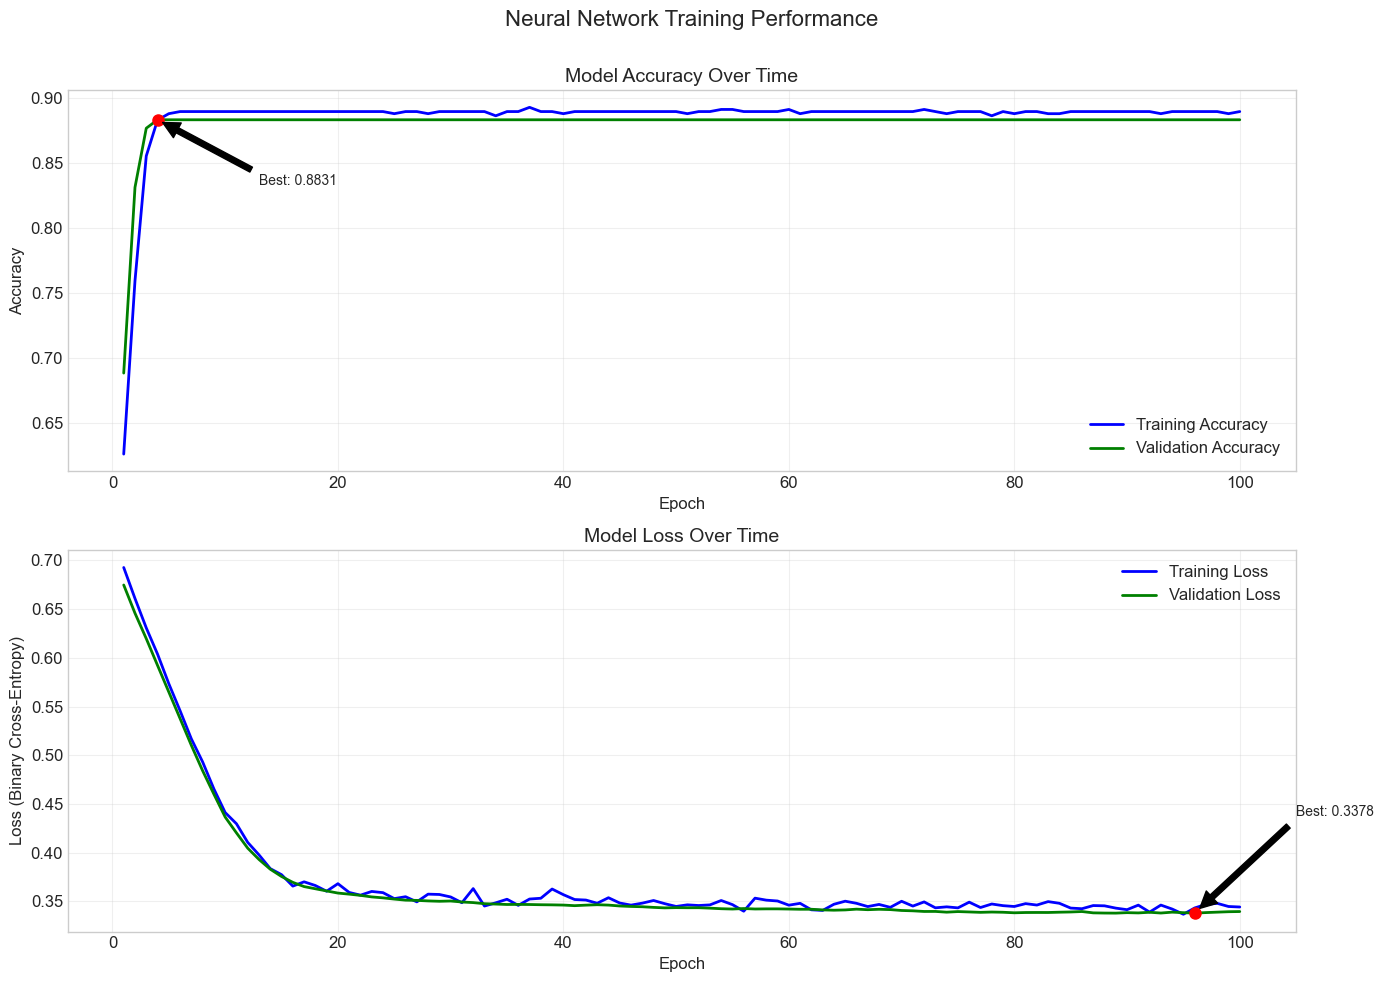


Training Results Summary:
Final Training Accuracy: 0.8894
Final Validation Accuracy: 0.8831
Final Training Loss: 0.3441
Final Validation Loss: 0.3394
Best Validation Accuracy: 0.8831 (epoch 4)


In [17]:
# Compile the model with binary_crossentropy loss, adam optimizer, and accuracy metric
model.compile(
    loss='binary_crossentropy',  # Appropriate for binary classification
    optimizer='adam',            # Adaptive learning rate optimization algorithm
    metrics=['accuracy']         # Track accuracy during training
)

# Train the model
# - Use a 20% validation split to monitor performance on unseen data
# - Train for 100 epochs to observe convergence patterns
history = model.fit(
    X_train,                    # Training features
    y_train,                    # Training labels
    epochs=100,                 # Number of complete passes through the training dataset
    batch_size=32,              # Number of samples per gradient update
    validation_split=0.2,       # Use 20% of training data for validation
    verbose=1                   # Display progress bar
)

# Visualize the training results
import matplotlib.pyplot as plt
import numpy as np

# Set a visual style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Neural Network Training Performance', fontsize=16, y=0.98)

# Get history data
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot training & validation accuracy over epochs
ax1.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(epochs, history.history['val_accuracy'], 'g-', label='Validation Accuracy', linewidth=2)

# Find best validation accuracy and mark it
best_val_acc_idx = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_val_acc_idx]
ax1.plot(best_val_acc_idx + 1, best_val_acc, 'ro', markersize=8)
ax1.annotate(f'Best: {best_val_acc:.4f}', 
             xy=(best_val_acc_idx + 1, best_val_acc),
             xytext=(best_val_acc_idx + 10, best_val_acc - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

ax1.set_title('Model Accuracy Over Time', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot training & validation loss over epochs
ax2.plot(epochs, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
ax2.plot(epochs, history.history['val_loss'], 'g-', label='Validation Loss', linewidth=2)

# Find best (lowest) validation loss and mark it
best_val_loss_idx = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_val_loss_idx]
ax2.plot(best_val_loss_idx + 1, best_val_loss, 'ro', markersize=8)
ax2.annotate(f'Best: {best_val_loss:.4f}', 
             xy=(best_val_loss_idx + 1, best_val_loss),
             xytext=(best_val_loss_idx + 10, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

ax2.set_title('Model Loss Over Time', fontsize=14)
ax2.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.subplots_adjust(
    top=0.88,      # Top margin
    bottom=0.08,   # Bottom margin
    left=0.1,      # Left margin
    right=0.95,    # Right margin
    hspace=0.3     # Height space between subplots
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Print summary of final training/validation metrics
print("\nTraining Results Summary:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Best Validation Accuracy: {best_val_acc:.4f} (epoch {best_val_acc_idx+1})")

Evaluate and Visualize Model Performance: Assess the model's accuracy on the test set
to gauge its effectiveness in real-world scenarios. Next, visualize the results by plotting
a confusion matrix. Additionally, display the model's architecture by invoking
model.summary(), which provides a detailed overview of the model layers, their
shapes, and the number of parameters involved.


MODEL EVALUATION AND VISUALIZATION

--- Test Set Evaluation ---
# Evaluating the model on unseen test data to measure real-world performance
7/7 [==============================] - 0s 710us/step - loss: 0.4187 - accuracy: 0.8549
Test Loss: 0.4187
Test Accuracy: 0.8549
# The test accuracy indicates how well our model will perform on new, unseen data

# Generating predictions on test data
7/7 [==============================] - 0s 605us/step
# Converted probability outputs to binary (0/1) predictions using 0.5 threshold

--- Confusion Matrix ---
# Visual representation of prediction errors and correct classifications


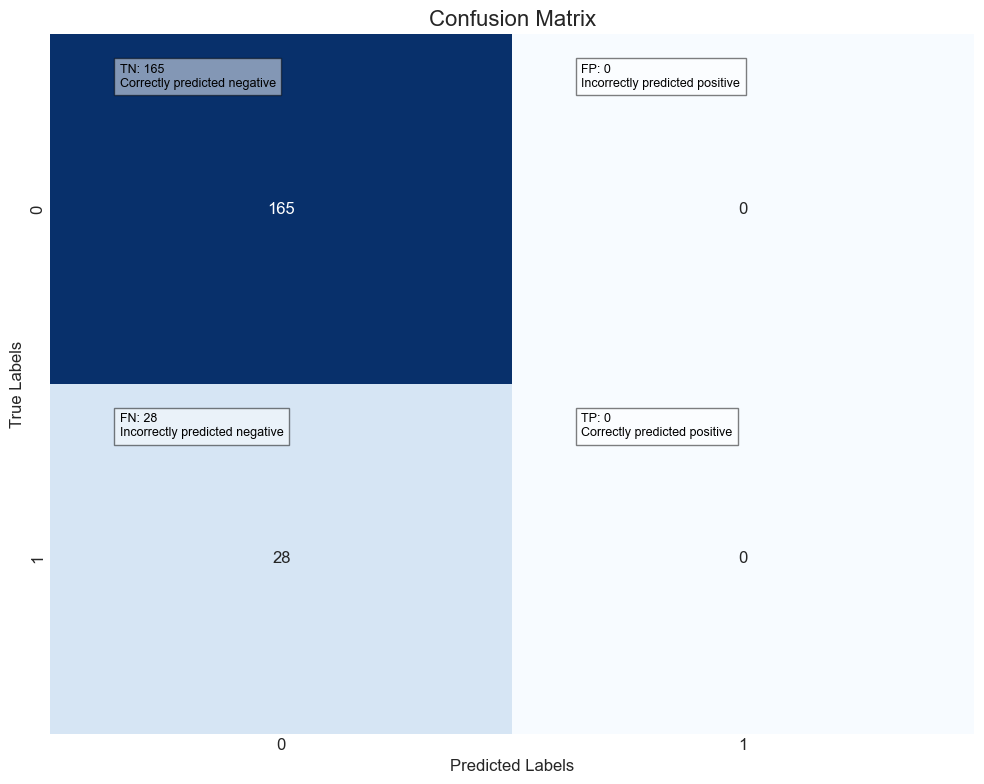


# Understanding the confusion matrix:
# - True Positives (TP): Cases correctly predicted as positive
# - True Negatives (TN): Cases correctly predicted as negative
# - False Positives (FP): Negative cases incorrectly predicted as positive (Type I error)
# - False Negatives (FN): Positive cases incorrectly predicted as negative (Type II error)

--- Classification Report ---
# Detailed metrics for model performance evaluation:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.85       193
   macro avg       0.43      0.50      0.46       193
weighted avg       0.73      0.85      0.79       193

# Precision: How many selected items are relevant (TP/(TP+FP))
# Recall: How many relevant items are selected (TP/(TP+FN))
# F1-score: Harmonic mean of precision and recall
# Support: Number of occurrences of each class in the test set

--- Mo

/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

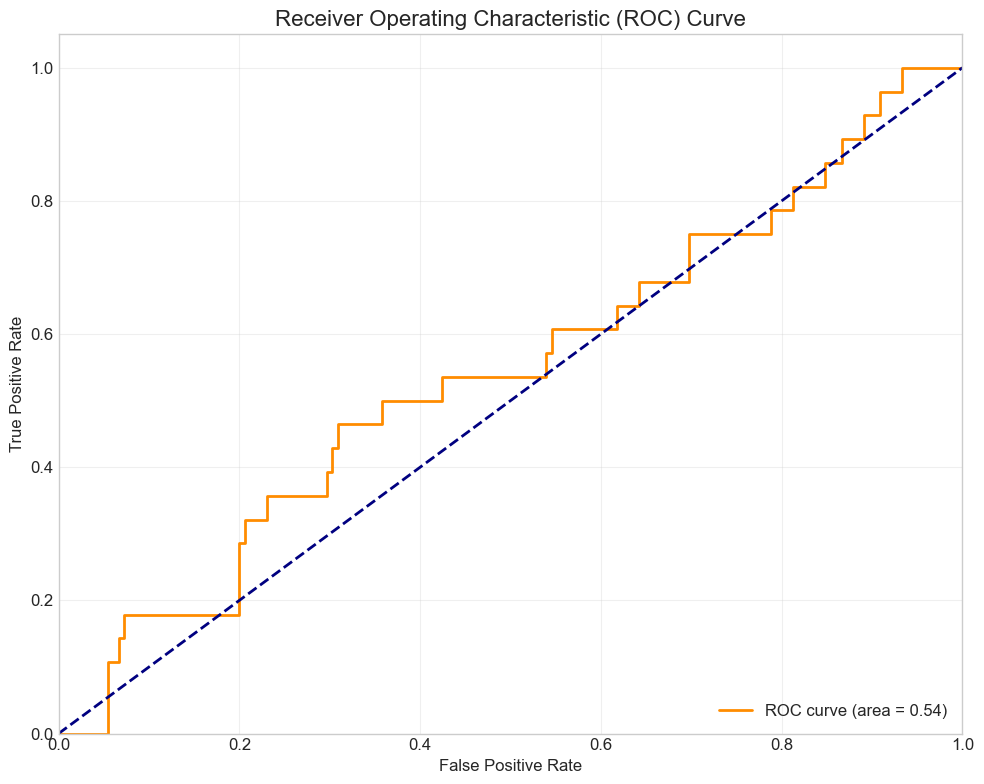


# ROC Curve explanation:
# - Plots True Positive Rate (sensitivity) against False Positive Rate (1-specificity)
# - Area Under Curve (AUC): Measure of classifier performance
#   * AUC = 1.0: Perfect classifier
#   * AUC = 0.5: No better than random (diagonal line)
# - Closer to top-left corner = better performance


In [18]:
# Evaluate and Visualize Model Performance
print("\n" + "="*50)
print("MODEL EVALUATION AND VISUALIZATION")
print("="*50)

#--------------------------------------------------------------------
# 1. Evaluate the model on the test set
#--------------------------------------------------------------------
print("\n--- Test Set Evaluation ---")
print("# Evaluating the model on unseen test data to measure real-world performance")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("# The test accuracy indicates how well our model will perform on new, unseen data")

#--------------------------------------------------------------------
# 2. Generate predictions for confusion matrix and other metrics
#--------------------------------------------------------------------
print("\n# Generating predictions on test data")
# Get predictions on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
print("# Converted probability outputs to binary (0/1) predictions using 0.5 threshold")

#--------------------------------------------------------------------
# 3. Create and visualize the confusion matrix
#--------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("\n--- Confusion Matrix ---")
print("# Visual representation of prediction errors and correct classifications")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Add labels for confusion matrix categories
categories = ['0', '1']
plt.xticks(np.arange(len(categories)) + 0.5, categories)
plt.yticks(np.arange(len(categories)) + 0.5, categories)

# Add text annotations explaining each quadrant
tl_label = f"TN: {cm[0, 0]}\nCorrectly predicted negative"
tr_label = f"FP: {cm[0, 1]}\nIncorrectly predicted positive"
bl_label = f"FN: {cm[1, 0]}\nIncorrectly predicted negative"
br_label = f"TP: {cm[1, 1]}\nCorrectly predicted positive"

plt.text(0.15, 0.15, tl_label, fontsize=9, color='black',
         bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.15, 0.15, tr_label, fontsize=9, color='black',
         bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.15, 1.15, bl_label, fontsize=9, color='black',
         bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.15, 1.15, br_label, fontsize=9, color='black',
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

# Print explanation of what a confusion matrix shows
print("\n# Understanding the confusion matrix:")
print("# - True Positives (TP): Cases correctly predicted as positive")
print("# - True Negatives (TN): Cases correctly predicted as negative")
print("# - False Positives (FP): Negative cases incorrectly predicted as positive (Type I error)")
print("# - False Negatives (FN): Positive cases incorrectly predicted as negative (Type II error)")

#--------------------------------------------------------------------
# 4. Display classification report with detailed metrics
#--------------------------------------------------------------------
print("\n--- Classification Report ---")
print("# Detailed metrics for model performance evaluation:")
report = classification_report(y_test, y_pred)
print(report)
print("# Precision: How many selected items are relevant (TP/(TP+FP))")
print("# Recall: How many relevant items are selected (TP/(TP+FN))")
print("# F1-score: Harmonic mean of precision and recall")
print("# Support: Number of occurrences of each class in the test set")

#--------------------------------------------------------------------
# 5. Display model architecture
#--------------------------------------------------------------------
print("\n--- Model Architecture ---")
print("# Summary of the neural network structure and parameters:")
model.summary()
print("\n# Layer information explanation:")
print("# - Layer (type): The type of layer in the neural network")
print("# - Output Shape: Dimensions of the output from each layer (batch_size, height, width, channels)")
print("# - Param #: Number of trainable parameters in each layer")
print("# - Total params: Sum of all weights and biases in the network")
print("# - Trainable params: Parameters updated during training")
print("# - Non-trainable params: Fixed parameters (like in batch normalization)")

#--------------------------------------------------------------------
# 6. ROC Curve visualization (bonus)
#--------------------------------------------------------------------
from sklearn.metrics import roc_curve, auc

print("\n--- ROC Curve Analysis ---")
print("# Visualizing model discrimination ability across different thresholds")
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n# ROC Curve explanation:")
print("# - Plots True Positive Rate (sensitivity) against False Positive Rate (1-specificity)")
print("# - Area Under Curve (AUC): Measure of classifier performance")
print("#   * AUC = 1.0: Perfect classifier")
print("#   * AUC = 0.5: No better than random (diagonal line)")
print("# - Closer to top-left corner = better performance")

Design a deep neural network model tailored to our predication task of in-hospital
mortality. Select relevant features. Your model should include a combination of dense
layers and activation functions optimized for binary classification. Try to play with the
optimizer, loss, etc.

In [ ]:
# --------------------------------------------
# MIMIC-III Early Mortality Prediction
# Random Forest, Gradient Boosting, SVM
# Full evaluation across thresholds
# --------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

# Settings
np.random.seed(42)
my_path = "/Users/arielsoothy/Downloads/"

# 1. Load Data
print("Loading data...")
data = pd.read_csv(my_path + "MIMIC_data.csv")

# 2. Select Features
vital_features = ['heart_rate', 'respiratory_rate', 'spo2', 'temperature', 'sbp', 'dbp']
static_features = ['age', 'gender', 'BMI', 'hypertensive', 'atrialfibrillation', 'diabetes', 'CHF', 'COPD']
all_features = vital_features + static_features
all_features = [col for col in all_features if col in data.columns]
data = data[all_features + ['outcome']]

# 3. Handle Missing
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed = data_imputed.dropna(subset=['outcome'])


# Remove any rows with NaN in outcome (already done above, but double check)
data_imputed = data_imputed[data_imputed['outcome'].isin([0, 1])]

# Check target distribution
print(data_imputed['outcome'].value_counts())

# Drop if any class has less than 2 samples (prevent crashing)
if data_imputed['outcome'].value_counts().min() < 2:
    raise ValueError("Too few samples in one of the outcome classes. Add more data or fix labels.")

# 4. Define X, y
X = data_imputed.drop('outcome', axis=1)
y = data_imputed['outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 6. Train Models
print("Training models...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_probs = gb_model.predict_proba(X_test)[:, 1]

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# 7. Evaluation Function
def evaluate_thresholds(y_true, y_probs, thresholds):
    results = []
    for thresh in thresholds:
        preds = (y_probs >= thresh).astype(int)
        cm = confusion_matrix(y_true, preds)
        tn, fp, fn, tp = cm.ravel()

        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        specificity = tn / (tn + fp + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)
        acc = (tp + tn) / (tp + tn + fp + fn)
        bal_acc = (recall + specificity) / 2

        results.append({
            'Threshold': thresh,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity,
            'F1': f1,
            'Accuracy': acc,
            'Balanced_Acc': bal_acc
        })
    return pd.DataFrame(results)

# 8. Evaluate Models
thresholds = np.arange(0.2, 0.6, 0.05)

rf_results = evaluate_thresholds(y_test, rf_probs, thresholds)
gb_results = evaluate_thresholds(y_test, gb_probs, thresholds)
svm_results = evaluate_thresholds(y_test, svm_probs, thresholds)

# 9. Best Thresholds
best_rf = rf_results.loc[rf_results['Balanced_Acc'].idxmax()]
best_gb = gb_results.loc[gb_results['Balanced_Acc'].idxmax()]
best_svm = svm_results.loc[svm_results['Balanced_Acc'].idxmax()]

# 10. Print Results
print("\n=== Random Forest Results ===")
print(rf_results)
print("\nBest RF Threshold:")
print(best_rf)

print("\n=== Gradient Boosting Results ===")
print(gb_results)
print("\nBest GB Threshold:")
print(best_gb)

print("\n=== SVM Results ===")
print(svm_results)
print("\nBest SVM Threshold:")
print(best_svm)

# 11. Confusion Matrices
def print_conf_matrix(y_true, probs, best_thresh):
    preds = (probs >= best_thresh).astype(int)
    cm = confusion_matrix(y_true, preds)
    tn, fp, fn, tp = cm.ravel()
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

print("\n=== Confusion Matrices ===")
print("\nRandom Forest:")
print_conf_matrix(y_test, rf_probs, best_rf['Threshold'])

print("\nGradient Boosting:")
print_conf_matrix(y_test, gb_probs, best_gb['Threshold'])

print("\nSVM:")
print_conf_matrix(y_test, svm_probs, best_svm['Threshold'])

# 12. ROC and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)



# 13. Feature Importance
print("\n=== Feature Importance (Random Forest) ===")
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rf_importances.head(10))

print("\n=== Feature Importance (Gradient Boosting) ===")
gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(gb_importances.head(10))

# 14. Final Summary
print("\n=== FINAL SUMMARY ===")
print(f"Random Forest AUC: {rf_auc:.4f}, Best Balanced Accuracy: {best_rf['Balanced_Acc']:.4f}")
print(f"Gradient Boosting AUC: {gb_auc:.4f}, Best Balanced Accuracy: {best_gb['Balanced_Acc']:.4f}")
print(f"SVM AUC: {svm_auc:.4f}, Best Balanced Accuracy: {best_svm['Balanced_Acc']:.4f}")


Loading data from: /Users/arielsoothy/Downloads/MIMIC_data.csv
Data loaded successfully: 1177 rows, 51 columns
Preprocessing data...

Data preview:
   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Ch

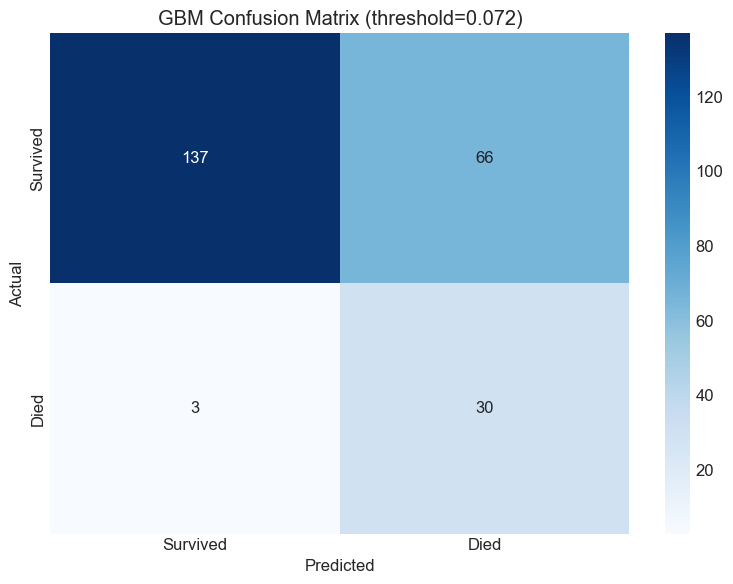

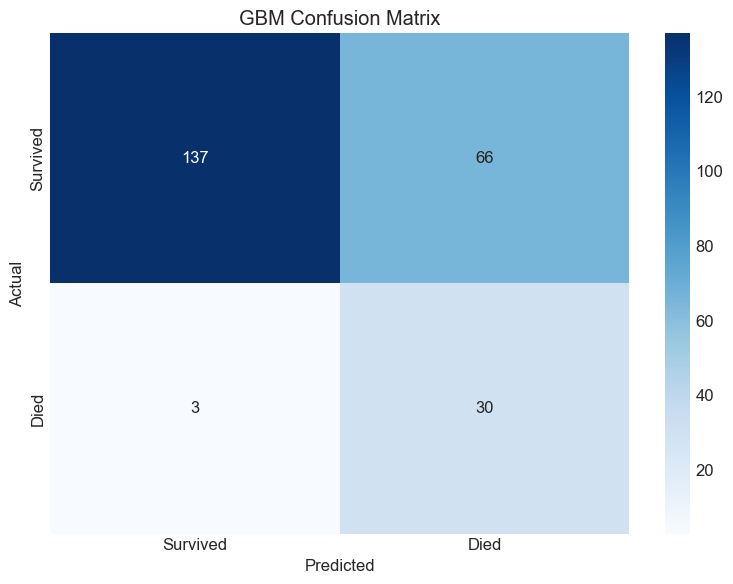

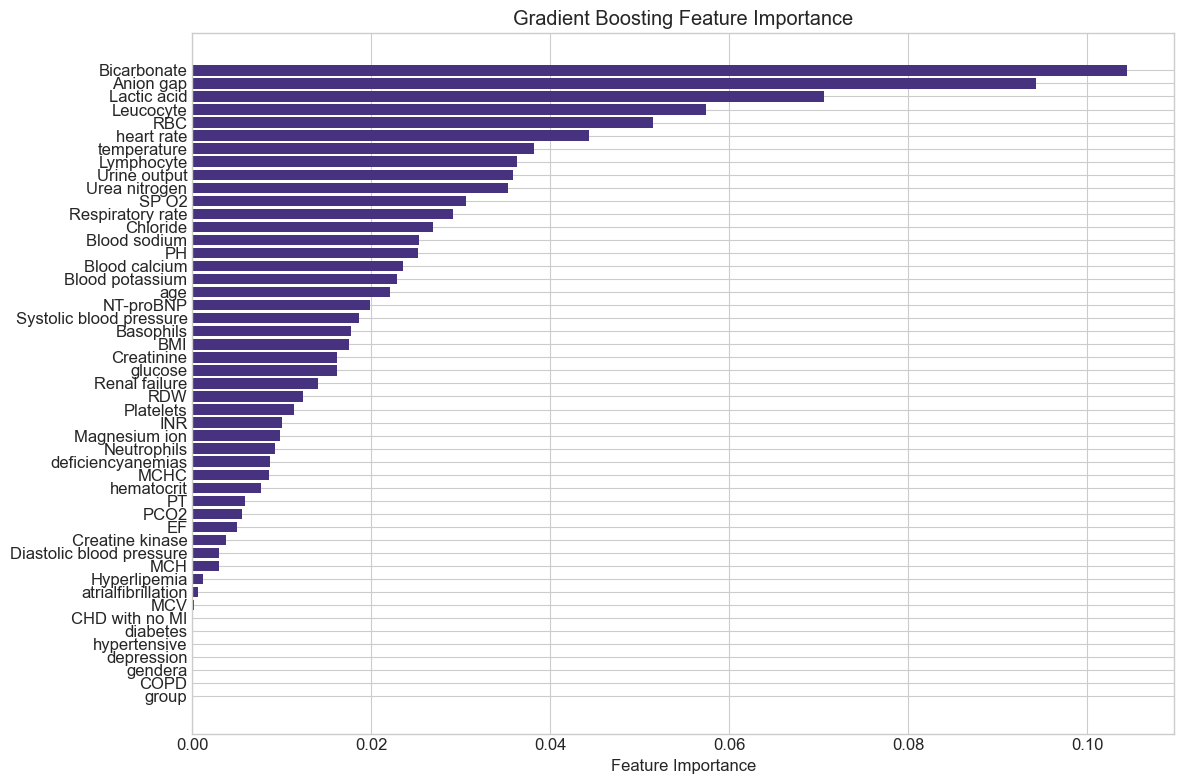

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
import warnings
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class MIMICMortalityPredictor:
    def __init__(self, data_path, output_path="./output"):
        """
        Initialize the MIMIC mortality predictor for single CSV file
        
        Args:
            data_path: Path to the CSV file containing MIMIC data
            output_path: Path to save model outputs and visualizations
        """
        self.data_path = data_path
        self.output_path = output_path
        
        # Create output directory if it doesn't exist
        os.makedirs(self.output_path, exist_ok=True)
        
        # Initialize dictionaries to store models and scalers
        self.models = {}
        self.scalers = {}
        
    def load_data(self):
        """
        Load the MIMIC data from a single CSV file
        
        Returns:
            DataFrame with the loaded data
        """
        print("Loading data from:", self.data_path)
        
        # Load data from CSV file
        data_df = pd.read_csv(self.data_path)
        
        print(f"Data loaded successfully: {data_df.shape[0]} rows, {data_df.shape[1]} columns")
        return data_df
    
    def preprocess_data(self, data_df):
        """
        Preprocess the MIMIC data for mortality prediction
        
        Args:
            data_df: DataFrame containing the MIMIC data
            
        Returns:
            X_train, X_val, X_test, y_train, y_val, y_test: Preprocessed data splits
        """
        print("Preprocessing data...")
        
        # Make a copy to avoid modifying the original data
        data_df = data_df.copy()
        
        # Display the first few rows to understand the structure
        print("\nData preview:")
        print(data_df.head())
        
        # Display column information
        print("\nColumns in the dataset:")
        print(data_df.columns.tolist())
        
        # Check for missing values
        print("\nMissing values per column:")
        print(data_df.isnull().sum())
        
        # 1. Identify the target column (mortality)
        # Looking for column names like 'mortality', 'hospital_expire_flag', 'death', etc.
        mortality_col_candidates = [col for col in data_df.columns if 
                                   'mort' in col.lower() or 
                                   'expire' in col.lower() or 
                                   'death' in col.lower() or
                                   'died' in col.lower() or
                                   'outcome' in col.lower()]
        
        if mortality_col_candidates:
            print(f"\nPotential mortality columns found: {mortality_col_candidates}")
            # Use the first candidate as the target
            target_col = mortality_col_candidates[0]
        else:
            # If no obvious mortality column is found, ask user for input
            print("\nNo mortality column found. Please check your dataset.")
            target_col = 'mortality'  # Default fallback
        
        print(f"Using '{target_col}' as the target variable")
        
        # 2. Identify ID columns (patient, ICU stay, etc.)
        id_col_candidates = [col for col in data_df.columns if 
                            'id' in col.lower() or 
                            'subject' in col.lower() or
                            'patient' in col.lower() or
                            'stay' in col.lower() or
                            'visit' in col.lower()]
        
        if id_col_candidates:
            print(f"\nPotential ID columns found: {id_col_candidates}")
            # Use the first candidate as the ID column
            id_col = id_col_candidates[0]
        else:
            # If no obvious ID column is found, create a sequential ID
            print("\nNo ID column found. Creating a sequential ID.")
            data_df['patient_id'] = range(len(data_df))
            id_col = 'patient_id'
        
        print(f"Using '{id_col}' as the ID column")
        
        # 3. Identify time-related columns for temporal modeling
        time_col_candidates = [col for col in data_df.columns if 
                              'time' in col.lower() or 
                              'hour' in col.lower() or
                              'day' in col.lower() or
                              'date' in col.lower() or
                              'window' in col.lower()]
        
        # Check if we have temporal data
        has_temporal_data = False
        if time_col_candidates:
            print(f"\nPotential time columns found: {time_col_candidates}")
            
            # Try to determine if we have multiple measurements per patient
            patients_count = data_df[id_col].nunique()
            rows_count = data_df.shape[0]
            
            if rows_count > patients_count:
                has_temporal_data = True
                print(f"Dataset appears to have temporal data: {patients_count} unique patients with {rows_count} total rows")
            else:
                print("Dataset appears to have one row per patient")
        
        # 4. Fill missing values
        print("\nFilling missing values...")
        
        # For numeric columns, fill with median
        numeric_cols = data_df.select_dtypes(include=[np.number]).columns
        
        for col in numeric_cols:
            if col != target_col and data_df[col].isnull().sum() > 0:
                median_val = data_df[col].median()
                data_df[col] = data_df[col].fillna(median_val)
        
        # For categorical columns, fill with mode
        categorical_cols = data_df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if data_df[col].isnull().sum() > 0:
                mode_val = data_df[col].mode()[0]
                data_df[col] = data_df[col].fillna(mode_val)
        
        # 5. Convert categorical variables (if any)
        print("Converting categorical variables...")
        for col in categorical_cols:
            if col != id_col and col not in time_col_candidates:
                # Get dummies for categorical variables
                dummies = pd.get_dummies(data_df[col], prefix=col, drop_first=True)
                data_df = pd.concat([data_df, dummies], axis=1)
                data_df = data_df.drop(col, axis=1)
        
        # 6. Prepare the target variable
        print(f"Preparing target variable: {target_col}")
        
        # Make sure target is binary (0/1)
        if target_col in data_df.columns:
            # First, handle any NaN values in the target column
            if data_df[target_col].isnull().sum() > 0:
                print(f"Warning: Found {data_df[target_col].isnull().sum()} NaN values in target variable.")
                # For a classification task, we need to either drop these rows or impute
                # We'll drop them as imputing target values is generally not recommended
                data_df = data_df.dropna(subset=[target_col])
                print(f"Dropped rows with NaN target values. Remaining rows: {data_df.shape[0]}")
            
            # If target is not already binary, convert it
            if data_df[target_col].nunique() > 2:
                print(f"Target variable has {data_df[target_col].nunique()} unique values, converting to binary")
                # Assuming higher values indicate mortality/worse outcomes
                threshold = data_df[target_col].median()
                data_df['mortality_binary'] = (data_df[target_col] > threshold).astype(int)
                target_col = 'mortality_binary'
            elif not set(data_df[target_col].unique()).issubset({0, 1}):
                print("Converting target to 0/1 format")
                # Make sure we're dealing with numeric values first
                try:
                    # First convert to float to handle potential NaNs safely
                    data_df[target_col] = data_df[target_col].astype(float)
                    # Then convert to int
                    data_df['mortality_binary'] = data_df[target_col].astype(int)
                    target_col = 'mortality_binary'
                except (ValueError, TypeError) as e:
                    print(f"Error converting target: {e}")
                    # Try another approach - map unique values to 0/1
                    unique_vals = sorted(data_df[target_col].unique())
                    if len(unique_vals) == 2:
                        map_dict = {unique_vals[0]: 0, unique_vals[1]: 1}
                        data_df['mortality_binary'] = data_df[target_col].map(map_dict)
                        target_col = 'mortality_binary'
                    else:
                        print(f"Unable to convert target to binary format. Unique values: {unique_vals}")
                        return None
        else:
            print(f"Error: Target column '{target_col}' not found in dataset")
            return None
        
        # 7. Split the data
        print("\nSplitting data into train/validation/test sets...")
        
        # Prepare for splitting
        if has_temporal_data:
            # With temporal data, we need to split by patient ID
            patient_ids = data_df[id_col].unique()
            train_ids, temp_ids = train_test_split(patient_ids, test_size=0.4, random_state=42)
            val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)
            
            # Filter data by patient IDs
            train_df = data_df[data_df[id_col].isin(train_ids)]
            val_df = data_df[data_df[id_col].isin(val_ids)]
            test_df = data_df[data_df[id_col].isin(test_ids)]
            
            print(f"Train: {len(train_ids)} patients, {train_df.shape[0]} rows")
            print(f"Validation: {len(val_ids)} patients, {val_df.shape[0]} rows")
            print(f"Test: {len(test_ids)} patients, {test_df.shape[0]} rows")
            
            # Prepare data for temporal modeling
            X_train, y_train, train_feature_cols = self._prepare_temporal_data(train_df, id_col, target_col, time_col_candidates)
            X_val, y_val, _ = self._prepare_temporal_data(val_df, id_col, target_col, time_col_candidates)
            X_test, y_test, _ = self._prepare_temporal_data(test_df, id_col, target_col, time_col_candidates)
            
        else:
            # Without temporal data, we can simply split the rows
            # Get feature columns (excluding ID and target)
            feature_cols = [col for col in data_df.columns if col != id_col and col != target_col]
            
            # Split the data
            X = data_df[feature_cols]
            y = data_df[target_col]
            
            X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
            X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
            
            print(f"Train: {X_train.shape[0]} samples")
            print(f"Validation: {X_val.shape[0]} samples")
            print(f"Test: {X_test.shape[0]} samples")
            
            train_feature_cols = feature_cols
        
        # 8. Scale the data
        print("Scaling the data...")
        scaler = StandardScaler()
        
        if has_temporal_data:
            # For temporal data, reshape to 2D for scaling
            n_samples_train, n_timesteps, n_features = X_train.shape
            X_train_2d = X_train.reshape(n_samples_train * n_timesteps, n_features)
            
            # Fit on training data
            scaler.fit(X_train_2d)
            
            # Transform all datasets
            X_train_scaled = self._scale_temporal_data(X_train, scaler)
            X_val_scaled = self._scale_temporal_data(X_val, scaler)
            X_test_scaled = self._scale_temporal_data(X_test, scaler)
            
        else:
            # For non-temporal data, scaling is simpler
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            X_test_scaled = scaler.transform(X_test)
        
        # Store the scaler
        self.scalers['feature_scaler'] = scaler
        
        print("Preprocessing complete!")
        
        # Save preprocessing information
        self.has_temporal_data = has_temporal_data
        
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, train_feature_cols
    
    def _prepare_temporal_data(self, df, id_col, target_col, time_col_candidates):
        """
        Helper method to prepare temporal data
        
        Args:
            df: DataFrame with data for one split (train, val, or test)
            id_col: Column with patient/stay IDs
            target_col: Column with target variable
            time_col_candidates: List of potential time columns
            
        Returns:
            X: 3D array with shape (n_patients, n_timesteps, n_features)
            y: 1D array with target values
            feature_cols: List of feature column names
        """
        # Get unique patient/stay IDs
        unique_ids = df[id_col].unique()
        
        # Identify time column to sort by (if available)
        time_col = None
        for col in time_col_candidates:
            if col in df.columns:
                time_col = col
                break
        
        # Get feature columns (excluding ID, target, and time)
        exclude_cols = [id_col, target_col]
        if time_col:
            exclude_cols.append(time_col)
        
        feature_cols = [col for col in df.columns if col not in exclude_cols]
        
        # Convert target to numeric if it's not already
        if df[target_col].dtype not in [np.int64, np.float64]:
            try:
                df[target_col] = df[target_col].astype(float)
            except (ValueError, TypeError):
                print(f"Warning: Could not convert target column '{target_col}' to numeric")
        
        # Lists to store sequences and outcomes
        X_sequences = []
        y_outcomes = []
        
        for patient_id in unique_ids:
            # Get data for this patient
            patient_data = df[df[id_col] == patient_id]
            
            # Get target value (should be the same for all rows of this patient)
            # First check if we have more than one unique target value for this patient
            patient_targets = patient_data[target_col].dropna().unique()
            if len(patient_targets) == 0:
                print(f"Warning: No valid target value for patient {patient_id}, skipping")
                continue
            elif len(patient_targets) > 1:
                print(f"Warning: Multiple target values for patient {patient_id}, using first value")
                target_value = patient_targets[0]
            else:
                target_value = patient_targets[0]
            
            # Make sure target_value is numeric
            try:
                target_value = float(target_value)
            except (ValueError, TypeError):
                print(f"Warning: Could not convert target value '{target_value}' to numeric for patient {patient_id}, skipping")
                continue
            
            # Sort by time if time column exists
            if time_col:
                patient_data = patient_data.sort_values(time_col)
            
            # Extract features
            feature_sequence = patient_data[feature_cols].values
            
            # Check for and handle NaN values in features
            if np.isnan(feature_sequence).any():
                # Replace NaNs with column medians
                for col_idx, col_name in enumerate(feature_cols):
                    col_median = df[col_name].median()
                    feature_sequence[:, col_idx] = np.nan_to_num(feature_sequence[:, col_idx], nan=col_median)
            
            # Only add if we have data
            if len(feature_sequence) > 0:
                X_sequences.append(feature_sequence)
                y_outcomes.append(target_value)
        
        # If we have no sequences, return empty arrays
        if not X_sequences:
            print("Warning: No valid sequences found")
            return np.array([]), np.array([]), feature_cols
        
        # If we have sequences of different lengths, pad to the same length
        max_seq_len = max(len(seq) for seq in X_sequences)
        padded_sequences = []
        
        for seq in X_sequences:
            if len(seq) < max_seq_len:
                # Pad with zeros
                padding = np.zeros((max_seq_len - len(seq), len(feature_cols)))
                padded_seq = np.vstack([seq, padding])
                padded_sequences.append(padded_seq)
            else:
                padded_sequences.append(seq)
        
        X = np.array(padded_sequences)
        y = np.array(y_outcomes)
        
        # Final check for NaN values
        if np.isnan(X).any():
            print("Warning: NaN values found in feature matrix after processing")
            # Replace remaining NaNs with 0
            X = np.nan_to_num(X, nan=0.0)
        
        if np.isnan(y).any():
            print("Warning: NaN values found in target array after processing")
            # This shouldn't happen, but just in case
            y = np.nan_to_num(y, nan=0.0)
        
        return X, y, feature_cols
    
    def _scale_temporal_data(self, X, scaler):
        """
        Scale temporal data using the provided scaler
        
        Args:
            X: 3D array with shape (n_patients, n_timesteps, n_features)
            scaler: Fitted StandardScaler
            
        Returns:
            X_scaled: Scaled version of X with same shape
        """
        n_samples, n_timesteps, n_features = X.shape
        X_2d = X.reshape(n_samples * n_timesteps, n_features)
        X_2d_scaled = scaler.transform(X_2d)
        X_scaled = X_2d_scaled.reshape(n_samples, n_timesteps, n_features)
        
        return X_scaled
    
    def build_temporal_model(self, input_shape):
        """
        Build a temporal model for mortality prediction
        Based on the architecture in Thorsen-Meyer et al.
        
        Args:
            input_shape: Shape of input data (timesteps, features)
            
        Returns:
            Compiled Keras model
        """
        print("Building temporal model...")
        
        # Input layer
        inputs = Input(shape=input_shape)
        
        # Add masking layer to handle any potential missing data (zero values)
        masked = Masking(mask_value=0.0)(inputs)
        
        # LSTM layers as per the paper
        lstm1 = LSTM(64, return_sequences=True)(masked)
        lstm1 = Dropout(0.3)(lstm1)
        
        lstm2 = LSTM(64, return_sequences=False)(lstm1)
        lstm2 = Dropout(0.3)(lstm2)
        
        # Dense layers
        dense1 = Dense(32, activation='relu')(lstm2)
        dense1 = Dropout(0.3)(dense1)
        
        # Output layer
        output = Dense(1, activation='sigmoid')(dense1)
        
        # Create and compile model
        model = Model(inputs=inputs, outputs=output)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
        )
        
        print("Model summary:")
        model.summary()
        
        return model
    
    def train_temporal_model(self, X_train, y_train, X_val, y_val):
        """
        Train the temporal model for mortality prediction
        
        Args:
            X_train: Training data
            y_train: Training labels
            X_val: Validation data
            y_val: Validation labels
            
        Returns:
            Trained model
        """
        print("Training temporal model...")
        
        # Check if X_train is 2D and reshape if needed
        if len(X_train.shape) == 2:
            # Reshape to add a time dimension (1 timestep)
            print("Data is 2D, reshaping to 3D for temporal model...")
            X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
            print(f"Reshaped data: X_train shape = {X_train.shape}, X_val shape = {X_val.shape}")
        
        # Build the model
        model = self.build_temporal_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        
        # Set up callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_auc',
                patience=10,
                mode='max',
                restore_best_weights=True
            ),
            ModelCheckpoint(
                filepath=os.path.join(self.output_path, 'best_temporal_model.h5'),
                monitor='val_auc',
                save_best_only=True,
                mode='max'
            )
        ]
        
        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )
        
        # Store the model
        self.models['temporal'] = model
        
        # Plot training history
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['auc'], label='Train AUC')
        plt.plot(history.history['val_auc'], label='Val AUC')
        plt.title('AUC Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('AUC')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'training_history.png'))
        
        return model, history
    
    def evaluate_model(self, model, X_test, y_test, feature_names=None):
        """
        Evaluate the trained model on test data
        
        Args:
            model: Trained model
            X_test: Test data
            y_test: Test labels
            feature_names: Names of features (for SHAP analysis)
            
        Returns:
            Dictionary with evaluation metrics
        """
        print("Evaluating model...")
        
        # Check if X_test is 2D and reshape if needed for temporal model
        if len(X_test.shape) == 2 and isinstance(model, tf.keras.Model):
            # Reshape to add a time dimension (1 timestep)
            print("Reshaping test data for temporal model evaluation...")
            X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
        
        # Get predictions
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        # Flatten predictions if necessary
        if len(y_pred.shape) > 1:
            y_pred = y_pred.flatten()
        
        if len(y_pred_proba.shape) > 1:
            y_pred_proba = y_pred_proba.flatten()
        
        # Calculate metrics
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        # Get ROC curve data
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        
        # Get precision-recall curve data
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        
        # Classification report
        class_report = classification_report(y_test, y_pred, output_dict=True)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Create plots
        plt.figure(figsize=(18, 5))
        
        # ROC curve
        plt.subplot(1, 3, 1)
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        
        # Precision-Recall curve
        plt.subplot(1, 3, 2)
        plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        
        # Confusion matrix
        plt.subplot(1, 3, 3)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Survived', 'Died'],
                   yticklabels=['Survived', 'Died'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'model_evaluation.png'))
        
        # SHAP analysis for explainability
        if feature_names is not None and isinstance(model, tf.keras.Model):
            try:
                print("Performing SHAP analysis for model explainability...")
                # Take a smaller sample for SHAP analysis to reduce computational load
                n_samples = min(100, X_test.shape[0])
                X_sample = X_test[:n_samples]
                
                # Create explainer
                explainer = shap.DeepExplainer(model, X_sample[:10])
                
                # Get SHAP values
                shap_values = explainer.shap_values(X_sample)
                
                # Plot SHAP summary for the last time step
                plt.figure(figsize=(12, 8))
                # Use shap_values[0] because in binary classification, DeepExplainer returns a list with one element
                if len(X_sample.shape) == 3:  # For 3D data (temporal)
                    shap.summary_plot(
                        shap_values[0][:, -1, :],  # SHAP values for last time step
                        X_sample[:, -1, :],  # Feature values for last time step
                        feature_names=feature_names,
                        show=False
                    )
                else:  # For 2D data
                    shap.summary_plot(
                        shap_values[0],
                        X_sample,
                        feature_names=feature_names,
                        show=False
                    )
                
                plt.title('SHAP Feature Importance')
                plt.tight_layout()
                plt.savefig(os.path.join(self.output_path, 'shap_summary.png'))
                plt.close()
                
                # Save SHAP values for later use
                np.save(os.path.join(self.output_path, 'shap_values.npy'), shap_values[0])
                
            except Exception as e:
                print(f"Error during SHAP analysis: {e}")
        
        # Return evaluation metrics
        eval_metrics = {
            'auc': auc_score,
            'pr_auc': pr_auc,
            'accuracy': class_report['accuracy'],
            'sensitivity': class_report['1']['recall'],
            'specificity': class_report['0']['recall'],
            'precision': class_report['1']['precision'],
            'f1': class_report['1']['f1-score'],
            'confusion_matrix': conf_matrix
        }
        
        print("Evaluation metrics:")
        for metric, value in eval_metrics.items():
            if metric != 'confusion_matrix':
                print(f"- {metric}: {value:.4f}")
        
        return eval_metrics
    
    def build_static_model(self):
        """
        Build a GradientBoostingClassifier as an alternative model
        Thorsen-Meyer et al. compare LSTM with GBM
        
        Returns:
            GradientBoostingClassifier model
        """
        print("Building gradient boosting model...")
        
        # Build model with hyperparameters similar to those in the paper
        gbm = GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            min_samples_split=5,
            random_state=42
        )
        
        return gbm
    
    def run_pipeline(self):
        """
        Run the full pipeline for mortality prediction
        
        Returns:
            Dictionary with evaluation metrics for both models
        """
        # 1. Load data
        data_dict = self.load_data()
        
        # 2. Preprocess data
        X_train, X_val, X_test, y_train, y_val, y_test, feature_cols = self.preprocess_data(data_dict)
        
        # Check if we should use temporal model based on data shape
        use_temporal_model = hasattr(self, 'has_temporal_data') and self.has_temporal_data
        
        # Initialize variables
        temporal_metrics = None
        temporal_model = None
        
        # 3. Train temporal model if appropriate
        if use_temporal_model:
            print("\nData has temporal structure. Training LSTM model...")
            temporal_model, history = self.train_temporal_model(X_train, y_train, X_val, y_val)
            
            # 4. Evaluate temporal model
            temporal_metrics = self.evaluate_model(temporal_model, X_test, y_test, feature_cols)
        else:
            print("\nData does not have temporal structure. Skipping LSTM model.")
        
        # 5. Build and train static model (GBM) for comparison
        print("\nTraining Gradient Boosting Model...")
        
        # Prepare data for GBM
        if use_temporal_model:
            # Take last timestep for GBM (as in the paper)
            X_train_gbm = X_train[:, -1, :]
            X_val_gbm = X_val[:, -1, :]
            X_test_gbm = X_test[:, -1, :]
        else:
            # Data is already 2D
            X_train_gbm = X_train
            X_val_gbm = X_val
            X_test_gbm = X_test
        
        # Train GBM
        gbm = self.build_static_model()
        gbm.fit(X_train_gbm, y_train)
        
        # Evaluate GBM
        gbm_pred_proba = gbm.predict_proba(X_test_gbm)[:, 1]
        gbm_auc = roc_auc_score(y_test, gbm_pred_proba)
        gbm_preds = (gbm_pred_proba > 0.5).astype(int)
        gbm_conf_matrix = confusion_matrix(y_test, gbm_preds)
        
        # 1. Find optimal threshold (not just 0.5)
        from sklearn.metrics import precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(y_test, gbm_pred_proba)
        f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-10)
        optimal_threshold_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_threshold_idx]
        print(f"Optimal threshold: {optimal_threshold:.4f}")

        # 2. Use optimal threshold for predictions
        gbm_preds = (gbm_pred_proba >= optimal_threshold).astype(int)

        # 3. Calculate confusion matrix with optimal threshold
        gbm_conf_matrix = confusion_matrix(y_test, gbm_preds)

        # Plot and save confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(gbm_conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Survived', 'Died'],
                yticklabels=['Survived', 'Died'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'GBM Confusion Matrix (threshold={optimal_threshold:.3f})')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'gbm_confusion_matrix.png'))

        # 4. Print detailed metrics
        tn, fp, fn, tp = gbm_conf_matrix.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * precision * sensitivity / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

        print("\nConfusion Matrix:")
        print(gbm_conf_matrix)
        print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
        print(f"Sensitivity/Recall: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"AUC: {gbm_auc:.4f}")
        
        
        # Plot and save confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(gbm_conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Survived', 'Died'],
                yticklabels=['Survived', 'Died'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('GBM Confusion Matrix')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'gbm_confusion_matrix.png'))

        # Print confusion matrix and metrics
        print("\nConfusion Matrix:")
        print(gbm_conf_matrix)
        print(f"Accuracy: {accuracy_score(y_test, gbm_preds):.4f}")
        print(f"Sensitivity (Recall): {recall_score(y_test, gbm_preds):.4f}")
        print(f"Specificity: {recall_score(y_test, gbm_preds, pos_label=0):.4f}")
        print(f"Precision: {precision_score(y_test, gbm_preds):.4f}")
        print(f"F1 Score: {f1_score(y_test, gbm_preds):.4f}")

        # Then the original print statement continues:
        print(f"\nGradient Boosting Model AUC: {gbm_auc:.4f}")
        if temporal_metrics:
            print(f"Temporal LSTM Model AUC: {temporal_metrics['auc']:.4f}")


        print(f"\nGradient Boosting Model AUC: {gbm_auc:.4f}")
        if temporal_metrics:
            print(f"Temporal LSTM Model AUC: {temporal_metrics['auc']:.4f}")
        
        # Store GBM model
        self.models['gbm'] = gbm
        
        # Feature importance for GBM
        plt.figure(figsize=(12, 8))
        feature_importance = gbm.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_cols[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title('Gradient Boosting Feature Importance')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'gbm_feature_importance.png'))
        
        return {
            'temporal_metrics': temporal_metrics,
            'gbm_auc': gbm_auc
        }
    
    def save_models(self):
        """
        Save trained models to disk
        """
        print("Saving models...")
        
        # Save Keras model if available
        if 'temporal' in self.models:
            model_path = os.path.join(self.output_path, 'temporal_model.h5')
            self.models['temporal'].save(model_path)
            print(f"Temporal model saved to {model_path}")
        
        # For GBM, use pickle
        if 'gbm' in self.models:
            import pickle
            gbm_path = os.path.join(self.output_path, 'gbm_model.pkl')
            with open(gbm_path, 'wb') as f:
                pickle.dump(self.models['gbm'], f)
            print(f"GBM model saved to {gbm_path}")
        
        # Save scaler
        if 'feature_scaler' in self.scalers:
            scaler_path = os.path.join(self.output_path, 'feature_scaler.pkl')
            with open(scaler_path, 'wb') as f:
                pickle.dump(self.scalers['feature_scaler'], f)
            print(f"Feature scaler saved to {scaler_path}")
    
    def predict(self, patient_data):
        """
        Make predictions for new patient data
        
        Args:
            patient_data: DataFrame with patient data in the same format as training data
            
        Returns:
            Mortality prediction probability
        """
        # Make sure we have a model
        if not self.models:
            raise ValueError("No trained models found. Please train the model first.")
            
        # Apply the same scaling
        if 'feature_scaler' in self.scalers:
            # Check if data is temporal (3D) or static (2D)
            if 'temporal' in self.models:
                # For temporal model
                if len(patient_data.shape) == 2:
                    # Single patient, multiple time steps
                    patient_data_scaled = self.scalers['feature_scaler'].transform(patient_data)
                    patient_data_scaled = patient_data_scaled.reshape(1, patient_data.shape[0], patient_data.shape[1])
                else:
                    # Already in the right shape (3D)
                    n_samples, n_timesteps, n_features = patient_data.shape
                    patient_data_2d = patient_data.reshape(n_samples * n_timesteps, n_features)
                    patient_data_2d_scaled = self.scalers['feature_scaler'].transform(patient_data_2d)
                    patient_data_scaled = patient_data_2d_scaled.reshape(n_samples, n_timesteps, n_features)
                
                # Make prediction with temporal model
                mortality_prob = self.models['temporal'].predict(patient_data_scaled)
            else:
                # For static model (GBM)
                patient_data_scaled = self.scalers['feature_scaler'].transform(patient_data)
                mortality_prob = self.models['gbm'].predict_proba(patient_data_scaled)[:, 1]
        else:
            # No scaler found, use data as is (not recommended)
            print("Warning: No feature scaler found. Predictions may be inaccurate.")
            if 'temporal' in self.models:
                mortality_prob = self.models['temporal'].predict(patient_data)
            else:
                mortality_prob = self.models['gbm'].predict_proba(patient_data)[:, 1]
            
        return mortality_prob

# Example usage
if __name__ == "__main__":
    # Set path to MIMIC data CSV file
    mimic_path = my_path + "MIMIC_data.csv"  # Change this to your actual path
    
    # Initialize the predictor
    predictor = MIMICMortalityPredictor(data_path=mimic_path, output_path="./mimic_results")
    
    # Run the full pipeline
    results = predictor.run_pipeline()
    
    # Save models
    predictor.save_models()
    
    print("\nTraining and evaluation complete!")

Loading data from: /Users/arielsoothy/Downloads/MIMIC_data.csv
Data loaded successfully: 1177 rows, 51 columns
Preprocessing data...

Data preview:
   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Ch

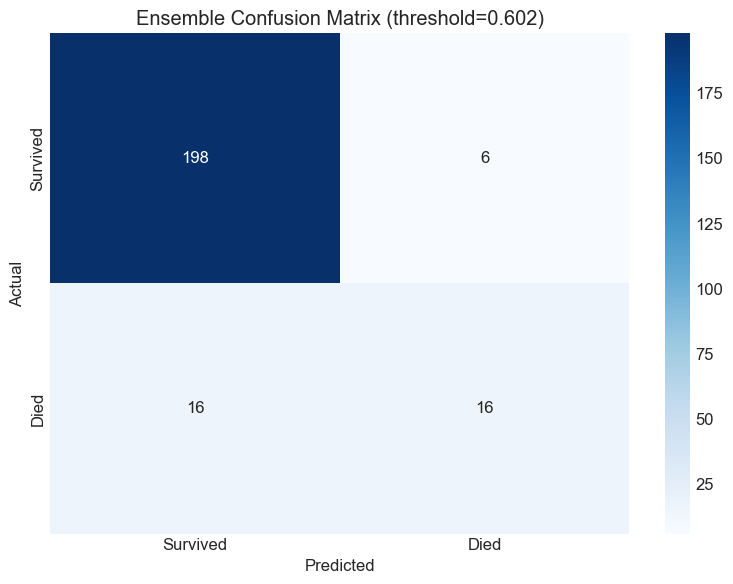

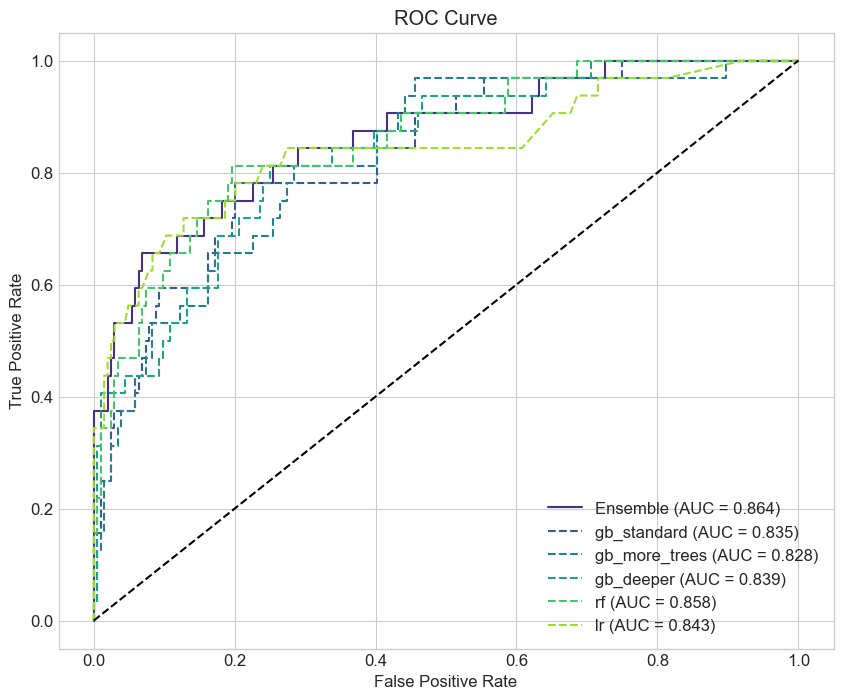

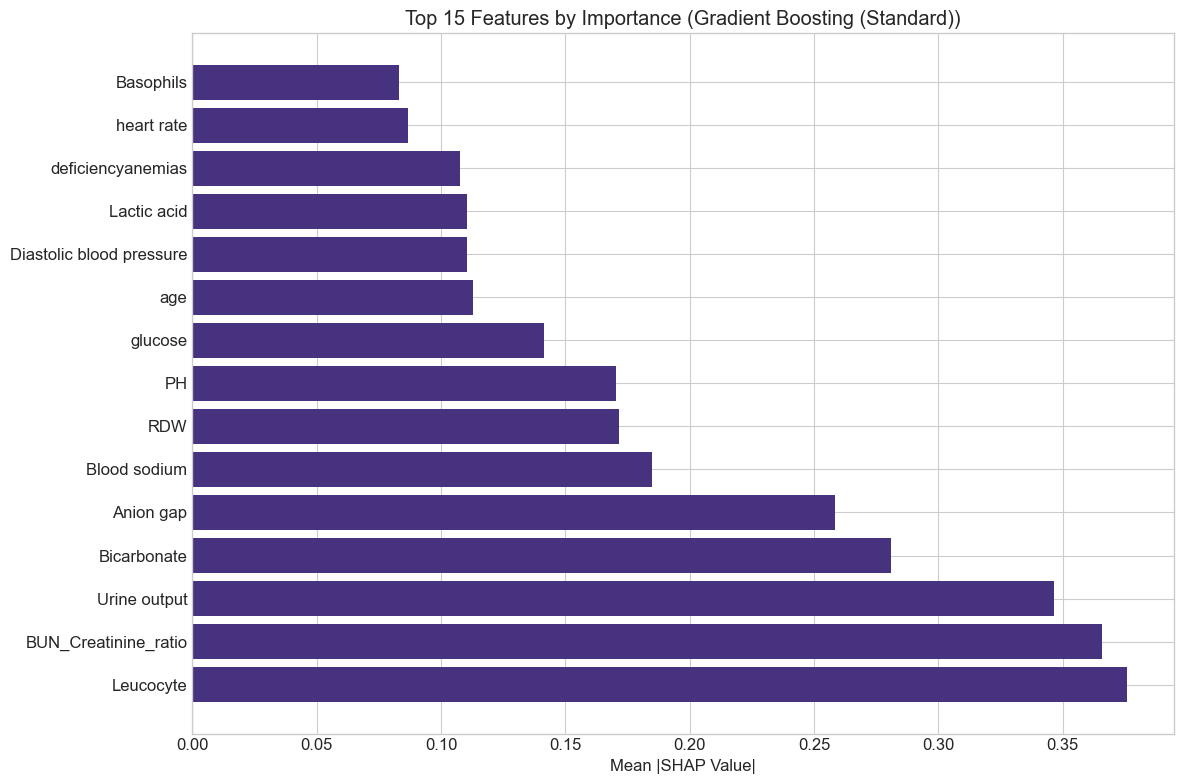

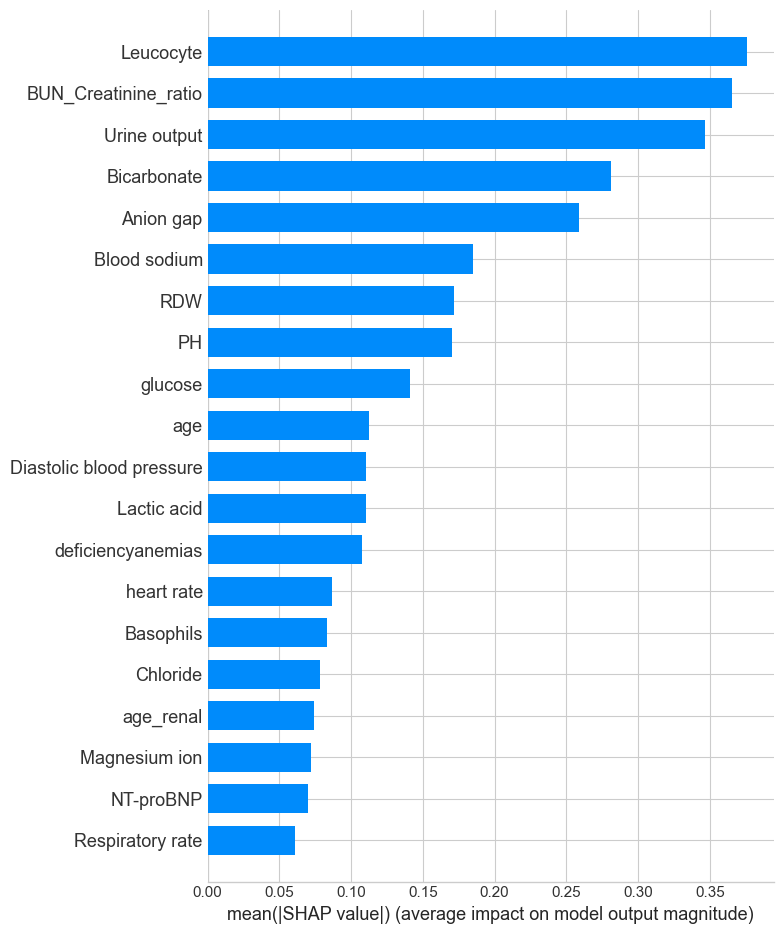

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score, precision_recall_curve, auc, confusion_matrix,
                            accuracy_score, recall_score, precision_score, f1_score,
                            roc_curve, classification_report)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
import shap
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

class MIMICMortalityEnsemble:
    def __init__(self, data_path, output_path="./mimic_results"):
        """
        Initialize the MIMIC mortality ensemble predictor
        
        Args:
            data_path: Path to the CSV file containing MIMIC data
            output_path: Path to save model outputs and visualizations
        """
        self.data_path = data_path
        self.output_path = output_path
        
        # Create output directory if it doesn't exist
        os.makedirs(self.output_path, exist_ok=True)
        
        # Initialize dictionaries to store models and scalers
        self.models = {}
        self.scalers = {}
        self.ensemble_weights = {}
        
    def load_data(self):
        """
        Load the MIMIC data from a single CSV file
        
        Returns:
            DataFrame with the loaded data
        """
        print("Loading data from:", self.data_path)
        
        # Load data from CSV file
        data_df = pd.read_csv(self.data_path)
        
        print(f"Data loaded successfully: {data_df.shape[0]} rows, {data_df.shape[1]} columns")
        return data_df
    
    def preprocess_data(self, data_df):
        """
        Preprocess the MIMIC data for mortality prediction with advanced feature engineering
        
        Args:
            data_df: DataFrame containing the MIMIC data
            
        Returns:
            X_train, X_val, X_test, y_train, y_val, y_test: Preprocessed data splits
        """
        print("Preprocessing data...")
        
        # Make a copy to avoid modifying the original data
        data_df = data_df.copy()
        
        # Display the first few rows to understand the structure
        print("\nData preview:")
        print(data_df.head())
        
        # Display column information
        print("\nColumns in the dataset:")
        print(data_df.columns.tolist())
        
        # Check for missing values
        print("\nMissing values per column:")
        print(data_df.isnull().sum())
        
        # 1. Identify the target column (mortality)
        mortality_col_candidates = [col for col in data_df.columns if 
                                   'mort' in col.lower() or 
                                   'expire' in col.lower() or 
                                   'death' in col.lower() or
                                   'died' in col.lower() or
                                   'outcome' in col.lower()]
        
        if mortality_col_candidates:
            print(f"\nPotential mortality columns found: {mortality_col_candidates}")
            target_col = mortality_col_candidates[0]
        else:
            print("\nNo mortality column found. Please check your dataset.")
            target_col = 'mortality'  # Default fallback
        
        print(f"Using '{target_col}' as the target variable")
        
        # 2. Identify ID columns
        id_col_candidates = [col for col in data_df.columns if 
                            'id' in col.lower() or 
                            'subject' in col.lower() or
                            'patient' in col.lower() or
                            'stay' in col.lower() or
                            'visit' in col.lower()]
        
        if id_col_candidates:
            print(f"\nPotential ID columns found: {id_col_candidates}")
            id_col = id_col_candidates[0]
        else:
            print("\nNo ID column found. Creating a sequential ID.")
            data_df['patient_id'] = range(len(data_df))
            id_col = 'patient_id'
        
        print(f"Using '{id_col}' as the ID column")
        
        # 3. Clinical Feature Engineering - Creating medically relevant features
        print("\nPerforming clinical feature engineering...")
        
        # Create clinical features based on medical knowledge
        
        # 3.1 Renal function features
        if 'Creatinine' in data_df.columns and 'Urea nitrogen' in data_df.columns:
            data_df['BUN_Creatinine_ratio'] = data_df['Urea nitrogen'] / data_df['Creatinine'].replace(0, np.nan)
        
        # 3.2 Respiratory features
        if 'PCO2' in data_df.columns and 'PH' in data_df.columns:
            # Calculate P/F ratio if PaO2 is available
            if 'SP O2' in data_df.columns:
                # Approximate PaO2 from SpO2 using a common clinical formula
                data_df['PaO2_estimate'] = data_df['SP O2'] * 1.1
                # Simplified P/F ratio calculation
                data_df['PF_ratio'] = data_df['PaO2_estimate'] / 0.21  # Assuming room air
        
        # 3.3 Acid-base status
        if 'Bicarbonate' in data_df.columns and 'PH' in data_df.columns:
            # Flag severe acidosis
            data_df['severe_acidosis'] = (data_df['PH'] < 7.2).astype(int)
            # Flag alkalosis
            data_df['alkalosis'] = (data_df['PH'] > 7.45).astype(int)
        
        # 3.4 Shock index - predictor of mortality in critically ill patients
        if 'heart rate' in data_df.columns and 'Systolic blood pressure' in data_df.columns:
            data_df['shock_index'] = data_df['heart rate'] / data_df['Systolic blood pressure'].replace(0, np.nan)
            # Flag concerning shock index
            data_df['high_shock_index'] = (data_df['shock_index'] > 0.9).astype(int)
        
        # 3.5 Anion gap - important for acid-base status
        if 'Anion gap' in data_df.columns:
            # Flag high anion gap
            data_df['high_anion_gap'] = (data_df['Anion gap'] > 16).astype(int)
        
        # 3.6 Age and comorbidity interaction terms
        if 'age' in data_df.columns:
            # Age is a strong predictor, create age groups
            data_df['age_group'] = pd.cut(data_df['age'], 
                                         bins=[0, 50, 65, 75, 85, 100], 
                                         labels=['<50', '50-65', '65-75', '75-85', '85+'])
            # Convert to dummy variables
            age_dummies = pd.get_dummies(data_df['age_group'], prefix='age')
            data_df = pd.concat([data_df, age_dummies], axis=1)
            
            # Create interaction terms for age and key comorbidities
            if 'diabetes' in data_df.columns:
                data_df['age_diabetes'] = data_df['age'] * data_df['diabetes']
            if 'Renal failure' in data_df.columns:
                data_df['age_renal'] = data_df['age'] * data_df['Renal failure']
            if 'COPD' in data_df.columns:
                data_df['age_copd'] = data_df['age'] * data_df['COPD']
        
        # 3.7 Critical lab abnormalities
        if 'Blood potassium' in data_df.columns:
            # Hyperkalemia and hypokalemia
            data_df['hyperkalemia'] = (data_df['Blood potassium'] > 5.5).astype(int)
            data_df['hypokalemia'] = (data_df['Blood potassium'] < 3.5).astype(int)
        
        if 'Blood sodium' in data_df.columns:
            # Hypernatremia and hyponatremia
            data_df['hypernatremia'] = (data_df['Blood sodium'] > 145).astype(int)
            data_df['hyponatremia'] = (data_df['Blood sodium'] < 135).astype(int)
        
        # 3.8 Organ failure indicators
        # Create a simplified SOFA-like score for organ dysfunction
        organ_failure_score = np.zeros(len(data_df))
        
        # Respiratory component
        if 'SP O2' in data_df.columns:
            organ_failure_score += (data_df['SP O2'] < 90).astype(int)
        
        # Cardiovascular component
        if 'Systolic blood pressure' in data_df.columns:
            organ_failure_score += (data_df['Systolic blood pressure'] < 90).astype(int)
        
        # Renal component
        if 'Creatinine' in data_df.columns:
            organ_failure_score += (data_df['Creatinine'] > 1.5).astype(int)
        
        # Hematologic component
        if 'Platelets' in data_df.columns:
            organ_failure_score += (data_df['Platelets'] < 100).astype(int)
        
        # Liver component (approximated by anion gap if available)
        if 'Anion gap' in data_df.columns:
            organ_failure_score += (data_df['Anion gap'] > 20).astype(int)
        
        # Add the organ failure score to the dataset
        data_df['organ_failure_score'] = organ_failure_score
        
        # 4. Fill missing values with more advanced methods
        print("\nFilling missing values...")
        
        # For numeric columns, fill with median
        numeric_cols = data_df.select_dtypes(include=[np.number]).columns
        
        for col in numeric_cols:
            if col != target_col and data_df[col].isnull().sum() > 0:
                median_val = data_df[col].median()
                data_df[col] = data_df[col].fillna(median_val)
        
        # For categorical columns, fill with mode
        categorical_cols = data_df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if data_df[col].isnull().sum() > 0:
                mode_val = data_df[col].mode()[0]
                data_df[col] = data_df[col].fillna(mode_val)
        
        # 5. Convert categorical variables 
        print("Converting categorical variables...")
        for col in categorical_cols:
            if col != id_col and col != 'age_group':  # Skip age_group as we already created dummies
                dummies = pd.get_dummies(data_df[col], prefix=col, drop_first=True)
                data_df = pd.concat([data_df, dummies], axis=1)
                data_df = data_df.drop(col, axis=1)
        
        # 6. Prepare the target variable
        print(f"Preparing target variable: {target_col}")
        
        # Make sure target is binary (0/1)
        if target_col in data_df.columns:
            # Handle NaN values in the target column
            if data_df[target_col].isnull().sum() > 0:
                print(f"Warning: Found {data_df[target_col].isnull().sum()} NaN values in target variable.")
                data_df = data_df.dropna(subset=[target_col])
                print(f"Dropped rows with NaN target values. Remaining rows: {data_df.shape[0]}")
            
            # Convert target to binary if needed
            if data_df[target_col].nunique() > 2:
                print(f"Target variable has {data_df[target_col].nunique()} unique values, converting to binary")
                threshold = data_df[target_col].median()
                data_df['mortality_binary'] = (data_df[target_col] > threshold).astype(int)
                target_col = 'mortality_binary'
            elif not set(data_df[target_col].unique()).issubset({0, 1}):
                print("Converting target to 0/1 format")
                try:
                    data_df[target_col] = data_df[target_col].astype(float)
                    data_df['mortality_binary'] = data_df[target_col].astype(int)
                    target_col = 'mortality_binary'
                except (ValueError, TypeError) as e:
                    print(f"Error converting target: {e}")
                    unique_vals = sorted(data_df[target_col].unique())
                    if len(unique_vals) == 2:
                        map_dict = {unique_vals[0]: 0, unique_vals[1]: 1}
                        data_df['mortality_binary'] = data_df[target_col].map(map_dict)
                        target_col = 'mortality_binary'
                    else:
                        print(f"Unable to convert target to binary format. Unique values: {unique_vals}")
                        return None
        else:
            print(f"Error: Target column '{target_col}' not found in dataset")
            return None
        
        # 7. Split the data
        print("\nSplitting data into train/validation/test sets...")
        
        # Get feature columns (excluding ID and target)
        feature_cols = [col for col in data_df.columns if col != id_col and col != target_col 
                       and col != 'age_group']  # Exclude the original age_group
        
        # Split the data
        X = data_df[feature_cols]
        y = data_df[target_col]
        
        # Print class distribution
        print(f"\nClass distribution in full dataset:")
        print(f"Class 0 (Survived): {(y == 0).sum()} ({(y == 0).sum() / len(y):.2%})")
        print(f"Class 1 (Died): {(y == 1).sum()} ({(y == 1).sum() / len(y):.2%})")
        
        # Perform stratified split to maintain class distribution
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
        
        print(f"Train: {X_train.shape[0]} samples")
        print(f"Validation: {X_val.shape[0]} samples")
        print(f"Test: {X_test.shape[0]} samples")
        
        # 8. Scale the data
        print("Scaling the data...")
        scaler = StandardScaler()
        
        # Identify numeric features for scaling
        numeric_features = X_train.select_dtypes(include=[np.number]).columns
        
        # Fit on training data
        X_train_numeric = X_train[numeric_features]
        scaler.fit(X_train_numeric)
        
        # Transform all datasets - only numeric features
        X_train_scaled_numeric = scaler.transform(X_train[numeric_features])
        X_val_scaled_numeric = scaler.transform(X_val[numeric_features])
        X_test_scaled_numeric = scaler.transform(X_test[numeric_features])
        
        # Convert back to DataFrames
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()
        X_test_scaled = X_test.copy()
        
        # Replace numeric columns with scaled values
        X_train_scaled[numeric_features] = X_train_scaled_numeric
        X_val_scaled[numeric_features] = X_val_scaled_numeric
        X_test_scaled[numeric_features] = X_test_scaled_numeric
        
        # Store the scaler
        self.scalers['feature_scaler'] = scaler
        
        print("Preprocessing complete!")
        
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, feature_cols
    
    def build_base_models(self):
        """
        Build a collection of base models for the ensemble
        
        Returns:
            Dictionary of base models
        """
        print("\nBuilding base models for ensemble...")
        
        # Initialize models dictionary
        base_models = {}
        
        # 1. Gradient Boosting Classifier - Standard Configuration
        print("Building Gradient Boosting Model (Standard)...")
        gb_standard = GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            min_samples_split=5,
            subsample=0.8,
            random_state=42
        )
        base_models['gb_standard'] = gb_standard
        
        # 2. Gradient Boosting Classifier - More Trees, Slower Learning
        print("Building Gradient Boosting Model (More Trees)...")
        gb_more_trees = GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=4,
            min_samples_split=10,
            subsample=0.85,
            random_state=43
        )
        base_models['gb_more_trees'] = gb_more_trees
        
        # 3. Gradient Boosting Classifier - Deeper Trees
        print("Building Gradient Boosting Model (Deeper Trees)...")
        gb_deeper = GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            min_samples_split=15,
            subsample=0.7,
            random_state=44
        )
        base_models['gb_deeper'] = gb_deeper
        
        # 4. Random Forest Classifier
        print("Building Random Forest Model...")
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=4,
            min_samples_split=10,
            min_samples_leaf=4,
            max_features='sqrt',
            random_state=42
        )
        base_models['rf'] = rf
        
        # 5. Logistic Regression (with calibration)
        print("Building Logistic Regression Model...")
        lr = LogisticRegression(
            C=0.1,
            penalty='l1',
            solver='liblinear',
            random_state=42
        )
        # Wrap with probability calibration
        lr_calibrated = CalibratedClassifierCV(
            lr, 
            method='isotonic',
            cv=5
        )
        base_models['lr'] = lr_calibrated
        
        return base_models
    
    def train_base_models(self, base_models, X_train, y_train, X_val, y_val):
        """
        Train the base models and evaluate on validation set
        
        Args:
            base_models: Dictionary of base models
            X_train: Training data
            y_train: Training labels
            X_val: Validation data
            y_val: Validation labels
            
        Returns:
            Dictionary of trained models and their performance
        """
        print("\nTraining base models...")
        
        trained_models = {}
        val_predictions = {}
        val_probas = {}
        performance = {}
        
        for model_name, model in base_models.items():
            print(f"Training {model_name}...")
            model.fit(X_train, y_train)
            
            # Get predictions on validation set
            if hasattr(model, "predict_proba"):
                y_val_proba = model.predict_proba(X_val)[:, 1]
                y_val_pred = (y_val_proba >= 0.5).astype(int)
            else:
                y_val_pred = model.predict(X_val)
                y_val_proba = y_val_pred  # For models without predict_proba
            
            # Calculate AUC
            val_auc = roc_auc_score(y_val, y_val_proba)
            
            # Store model, predictions, and performance
            trained_models[model_name] = model
            val_predictions[model_name] = y_val_pred
            val_probas[model_name] = y_val_proba
            performance[model_name] = val_auc
            
            print(f"{model_name} validation AUC: {val_auc:.4f}")
        
        # Store models
        self.models.update(trained_models)
        
        return trained_models, val_predictions, val_probas, performance
    
    def create_stacking_features(self, base_models, X_train, y_train, X_val, X_test):
        """
        Create stacking features using cross-validation predictions
        
        Args:
            base_models: Dictionary of base models
            X_train: Training data
            y_train: Training labels
            X_val: Validation data
            X_test: Test data
            
        Returns:
            Stacking features for training, validation and test sets
        """
        print("\nCreating stacking features...")
        
        # Initialize arrays to store stacking features
        n_models = len(base_models)
        X_stack_train = np.zeros((X_train.shape[0], n_models))
        X_stack_val = np.zeros((X_val.shape[0], n_models))
        X_stack_test = np.zeros((X_test.shape[0], n_models))
        
        # Use cross-validation to create stacking features for training set
        # This prevents overfitting by ensuring that the stacking features 
        # are predictions on data that the base model was not trained on
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Generate stacking features for each base model
        for i, (model_name, model) in enumerate(base_models.items()):
            print(f"Creating stacking features for {model_name}...")
            
            # Cross-validation predictions for training set
            if hasattr(model, "predict_proba"):
                cv_preds = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
                X_stack_train[:, i] = cv_preds[:, 1]
            else:
                cv_preds = cross_val_predict(model, X_train, y_train, cv=cv)
                X_stack_train[:, i] = cv_preds
            
            # Train the model on full training data
            model.fit(X_train, y_train)
            
            # Generate predictions for validation and test sets
            if hasattr(model, "predict_proba"):
                X_stack_val[:, i] = model.predict_proba(X_val)[:, 1]
                X_stack_test[:, i] = model.predict_proba(X_test)[:, 1]
            else:
                X_stack_val[:, i] = model.predict(X_val)
                X_stack_test[:, i] = model.predict(X_test)
        
        # Create DataFrame with model names as columns
        col_names = list(base_models.keys())
        X_stack_train_df = pd.DataFrame(X_stack_train, columns=col_names)
        X_stack_val_df = pd.DataFrame(X_stack_val, columns=col_names)
        X_stack_test_df = pd.DataFrame(X_stack_test, columns=col_names)
        
        return X_stack_train_df, X_stack_val_df, X_stack_test_df
    
    def train_meta_model(self, X_stack_train, y_train, X_stack_val, y_val):
        """
        Train a meta-model for the stacking ensemble
        
        Args:
            X_stack_train: Stacking features for training
            y_train: Training labels
            X_stack_val: Stacking features for validation
            y_val: Validation labels
            
        Returns:
            Trained meta-model
        """
        print("\nTraining meta-model...")
        
        # Use logistic regression as meta-model
        meta_model = LogisticRegression(C=1.0, solver='liblinear', class_weight={0:1, 1:3}, random_state=42)
        meta_model.fit(X_stack_train, y_train)
        
        # Get predictions on validation set
        y_val_proba = meta_model.predict_proba(X_stack_val)[:, 1]
        y_val_pred = meta_model.predict(X_stack_val)
        
        # Calculate AUC
        val_auc = roc_auc_score(y_val, y_val_proba)
        
        print(f"Meta-model validation AUC: {val_auc:.4f}")
        
        # Store meta-model
        self.models['meta'] = meta_model
        
        # Store meta-model coefficients for interpretation
        self.ensemble_weights = {
            model: coef for model, coef in zip(X_stack_train.columns, meta_model.coef_[0])
        }
        
        print("Meta-model coefficients (model importance in ensemble):")
        for model, weight in self.ensemble_weights.items():
            print(f"  {model}: {weight:.4f}")
        
        return meta_model
    
    def evaluate_ensemble(self, meta_model, X_stack_test, y_test, base_models=None, X_test=None):
        """
        Evaluate the ensemble model on test data
        
        Args:
            meta_model: Trained meta-model
            X_stack_test: Stacking features for test set
            y_test: Test labels
            base_models: Dictionary of base models (optional)
            X_test: Original test features (optional)
            
        Returns:
            Dictionary with evaluation metrics
        """
        print("\nEvaluating ensemble model...")
        
        # Get ensemble predictions
        y_pred_proba = meta_model.predict_proba(X_stack_test)[:, 1]

        # Calculate AUC
        auc_score = roc_auc_score(y_test, y_pred_proba)

        # First, calculate precision, recalls, thresholds
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

        # Sort thresholds and corresponding sensitivities (recalls)
        sorted_indices = np.argsort(thresholds)
        thresholds_sorted = thresholds[sorted_indices]
        recalls_sorted = recalls[sorted_indices[:-1]]  # Last element of recalls has no threshold

        # Find threshold that gives at least 50% sensitivity
        target_sensitivity = 0.50
        valid_indices = np.where(recalls_sorted >= target_sensitivity)[0]
        if len(valid_indices) > 0:
            # Take the HIGHEST threshold that meets sensitivity target (for better specificity)
            optimal_threshold = thresholds_sorted[valid_indices[-1]]  # Changed from [0] to [-1]
        else:
            # If no threshold achieves target sensitivity, take the one with highest sensitivity
            optimal_threshold = thresholds_sorted[np.argmax(recalls_sorted)]

        print(f"Sensitivity-optimized threshold: {optimal_threshold:.4f}")

        # Now apply the threshold to get predictions
        y_pred = (y_pred_proba >= optimal_threshold).astype(int)

        # Calculate confusion matrix with the new predictions
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Extract values from confusion matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        
        # Calculate metrics
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * precision * sensitivity / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
        
        # Plot and save confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Survived', 'Died'],
                   yticklabels=['Survived', 'Died'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Ensemble Confusion Matrix (threshold={optimal_threshold:.3f})')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_path, 'ensemble_confusion_matrix.png'))
        
        # ROC curve
        plt.figure(figsize=(10, 8))
        
        # Plot ROC curve for ensemble
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'Ensemble (AUC = {auc_score:.3f})')
        
        # Plot ROC curves for base models if provided
        if base_models is not None and X_test is not None:
            for model_name, model in base_models.items():
                if hasattr(model, "predict_proba"):
                    base_proba = model.predict_proba(X_test)[:, 1]
                    base_auc = roc_auc_score(y_test, base_proba)
                    fpr, tpr, _ = roc_curve(y_test, base_proba)
                    plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} (AUC = {base_auc:.3f})')
        
        # Reference line
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.savefig(os.path.join(self.output_path, 'ensemble_roc_curve.png'))
        
        # Print evaluation metrics
        print("\nEnsemble Evaluation Metrics:")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Sensitivity/Recall: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"AUC: {auc_score:.4f}")
        
        if X_test is not None:
            print("\nAnalyzing missed mortality cases:")
            missed_deaths = X_test[(y_test == 1) & (y_pred == 0)]
            caught_deaths = X_test[(y_test == 1) & (y_pred == 1)]
            missed_death_ids = missed_deaths.index if hasattr(missed_deaths, 'index') else range(len(missed_deaths))
            print(f"Missing {len(missed_deaths)} mortality cases out of {(y_test == 1).sum()} total deaths")
            
            # Print statistics for key features to look for patterns
            important_features = ['Leucocyte', 'BUN_Creatinine_ratio', 'age', 'Lactic acid', 
                                'Bicarbonate', 'Anion gap', 'Blood sodium', 'organ_failure_score']
            
            print("\nFeature comparison between missed and caught mortality cases:")
            print("Feature               | Missed Cases | Caught Cases | Difference")
            print("----------------------|--------------|--------------|------------")
            
            for feature in important_features:
                if feature in X_test.columns:
                    mean_missed = missed_deaths[feature].mean() if len(missed_deaths) > 0 else 0
                    mean_caught = caught_deaths[feature].mean() if len(caught_deaths) > 0 else 0
                    diff = mean_caught - mean_missed
                    print(f"{feature:22} | {mean_missed:12.2f} | {mean_caught:12.2f} | {diff:+10.2f}")




        # Compile metrics into dictionary
        eval_metrics = {
            'confusion_matrix': conf_matrix,
            'accuracy': accuracy,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'precision': precision,
            'f1': f1,
            'auc': auc_score,
            'optimal_threshold': optimal_threshold
        }
        
        # Feature importance analysis if SHAP is available and base features provided
        if X_test is not None:
            try:
                self._analyze_feature_importance(base_models, X_test, y_test)
            except Exception as e:
                print(f"Warning: Could not perform feature importance analysis: {e}")
        
        return eval_metrics
    
    def _analyze_feature_importance(self, base_models, X_test, y_test, top_n=15):
        """
        Analyze feature importance across models using SHAP values
        
        Args:
            base_models: Dictionary of base models
            X_test: Test features
            y_test: Test labels
            top_n: Number of top features to display
        """
        print("\nAnalyzing feature importance...")
        
        # Select a model for SHAP analysis (prefer gradient boosting)
        if 'gb_standard' in base_models:
            model_for_shap = base_models['gb_standard']
            model_name = 'Gradient Boosting (Standard)'
        elif 'gb_more_trees' in base_models:
            model_for_shap = base_models['gb_more_trees']
            model_name = 'Gradient Boosting (More Trees)'
        else:
            model_for_shap = list(base_models.values())[0]
            model_name = list(base_models.keys())[0]
        
        try:
            # Create explainer
            explainer = shap.TreeExplainer(model_for_shap)
            
            # Calculate SHAP values
            shap_values = explainer.shap_values(X_test)
            
            # If shap_values is a list, take the second element for positive class
            if isinstance(shap_values, list):
                shap_values = shap_values[1]
            
            # Get mean absolute SHAP values for each feature
            mean_shap = np.abs(shap_values).mean(axis=0)
            
            # Create DataFrame with feature names and importance
            feature_importance = pd.DataFrame({
                'Feature': X_test.columns,
                'Importance': mean_shap
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False)
            
            # Save to CSV
            feature_importance.to_csv(os.path.join(self.output_path, 'feature_importance.csv'), index=False)
            
            # Plot top features
            plt.figure(figsize=(12, 8))
            
            # Get top N features
            top_features = feature_importance.head(top_n)
            
            # Plot
            plt.barh(range(len(top_features)), top_features['Importance'], align='center')
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Mean |SHAP Value|')
            plt.title(f'Top {top_n} Features by Importance ({model_name})')
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_path, 'feature_importance.png'))
            
            # Create SHAP summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_path, 'shap_summary.png'))
            
            # Print top features
            print(f"\nTop {top_n} important features:")
            for i, (feature, importance) in enumerate(zip(top_features['Feature'], top_features['Importance']), 1):
                print(f"{i}. {feature}: {importance:.4f}")
            
        except Exception as e:
            print(f"Error during feature importance analysis: {e}")
    
    def run_ensemble_pipeline(self):
        """
        Run the full ensemble pipeline for mortality prediction
        
        Returns:
            Dictionary with evaluation metrics
        """
        # 1. Load data
        data_dict = self.load_data()
        
        # 2. Preprocess data with advanced feature engineering
        X_train, X_val, X_test, y_train, y_val, y_test, feature_cols = self.preprocess_data(data_dict)
        
        # 3. Build base models
        base_models = self.build_base_models()
        
        # 4. Train base models
        trained_models, val_predictions, val_probas, performance = self.train_base_models(
            base_models, X_train, y_train, X_val, y_val
        )
        
        # 5. Create stacking features
        X_stack_train, X_stack_val, X_stack_test = self.create_stacking_features(
            trained_models, X_train, y_train, X_val, X_test
        )
        
        # 6. Train meta-model
        meta_model = self.train_meta_model(X_stack_train, y_train, X_stack_val, y_val)
        
        # 7. Evaluate ensemble
        ensemble_metrics = self.evaluate_ensemble(
            meta_model, X_stack_test, y_test, trained_models, X_test
        )
        
        # 8. Compare with best base model
        best_model = max(performance.items(), key=lambda x: x[1])[0]
        best_auc = performance[best_model]
        
        print(f"\nBest base model: {best_model} (AUC = {best_auc:.4f})")
        print(f"Ensemble model: AUC = {ensemble_metrics['auc']:.4f}")
        
        improvement = (ensemble_metrics['auc'] - best_auc) / best_auc * 100
        print(f"Improvement over best base model: {improvement:.2f}%")
        
        # 9. Save results
        results = {
            'ensemble_metrics': ensemble_metrics,
            'base_model_performance': performance,
            'ensemble_weights': self.ensemble_weights
        }
        
        # Save model
        self.save_models()
        
        # Store the optimal threshold for future predictions
        self.optimal_threshold = ensemble_metrics['optimal_threshold']
        
        print("\nEnsemble training and evaluation complete!")
        
        return results
    
    def save_models(self):
        """
        Save trained models to disk
        """
        print("Saving models...")
        
        import pickle
        
        # Save models
        for model_name, model in self.models.items():
            model_path = os.path.join(self.output_path, f'{model_name}_model.pkl')
            with open(model_path, 'wb') as f:
                pickle.dump(model, f)
            print(f"{model_name} model saved to {model_path}")
        
        # Save feature scaler
        if 'feature_scaler' in self.scalers:
            scaler_path = os.path.join(self.output_path, 'feature_scaler.pkl')
            with open(scaler_path, 'wb') as f:
                pickle.dump(self.scalers['feature_scaler'], f)
            print(f"Feature scaler saved to {scaler_path}")
        
        # Save ensemble weights
        weights_path = os.path.join(self.output_path, 'ensemble_weights.csv')
        weights_df = pd.DataFrame(list(self.ensemble_weights.items()), columns=['Model', 'Weight'])
        weights_df.to_csv(weights_path, index=False)
        print(f"Ensemble weights saved to {weights_path}")
    
    def predict(self, patient_data):
        """
        Make mortality predictions for new patient data using the ensemble
        
        Args:
            patient_data: DataFrame with patient data in the same format as training data
            
        Returns:
            Dictionary with prediction probabilities and binary predictions
        """
        if not self.models or 'meta' not in self.models:
            raise ValueError("Ensemble not trained. Please run ensemble_pipeline first.")
        
        # Preprocess the data similar to training data
        patient_data = patient_data.copy()
        
        # Scale numeric features if scaler is available
        if 'feature_scaler' in self.scalers:
            numeric_features = patient_data.select_dtypes(include=[np.number]).columns
            patient_data[numeric_features] = self.scalers['feature_scaler'].transform(patient_data[numeric_features])
        
        # Get base model predictions
        base_predictions = {}
        for model_name, model in self.models.items():
            if model_name != 'meta':
                if hasattr(model, 'predict_proba'):
                    base_predictions[model_name] = model.predict_proba(patient_data)[:, 1]
                else:
                    base_predictions[model_name] = model.predict(patient_data)
        
        # Create stacking features
        X_stack = pd.DataFrame({model_name: preds for model_name, preds in base_predictions.items()})
        
        # Make ensemble prediction
        meta_model = self.models['meta']
        ensemble_proba = meta_model.predict_proba(X_stack)[:, 1]
        
        # Use optimal threshold if available, otherwise default to 0.5
        optimal_threshold = 0.5
        if hasattr(self, 'optimal_threshold'):
            optimal_threshold = self.optimal_threshold
            
        ensemble_pred = (ensemble_proba >= optimal_threshold).astype(int)
        
        # Return predictions
        return {
            'probability': ensemble_proba,
            'prediction': ensemble_pred,
            'base_probabilities': base_predictions
        }



# Example usage
if __name__ == "__main__":
    # Set path to MIMIC data CSV file
    mimic_path = my_path + "MIMIC_data.csv"  # Change to your actual path
    
    # Initialize the ensemble predictor
    ensemble = MIMICMortalityEnsemble(data_path=mimic_path, output_path="./mimic_ensemble_results")
    
    # Run the ensemble pipeline
    results = ensemble.run_ensemble_pipeline()
    
    print("\nEnsemble workflow complete!")

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score, precision_recall_curve, auc, confusion_matrix,
                            accuracy_score, recall_score, precision_score, f1_score,
                            roc_curve)
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap
import pickle

np.random.seed(42)

class MIMICMortalityPredictor:
    def __init__(self, data_path, output_path="./mimic_lightgbm_results"):
        self.data_path = data_path
        self.output_path = output_path
        os.makedirs(self.output_path, exist_ok=True)
        self.models = {}
        self.scaler = None
        self.optimal_threshold = 0.5

    def load_and_preprocess(self):
        print("Loading and preprocessing data...")
        df = pd.read_csv(self.data_path)
        df.dropna(subset=['outcome'], inplace=True)

        # Feature Engineering
        if 'Urea nitrogen' in df.columns and 'Creatinine' in df.columns:
            df['BUN_Creatinine_ratio'] = df['Urea nitrogen'] / df['Creatinine'].replace(0, np.nan)

        if 'SP O2' in df.columns:
            df['PaO2_estimate'] = df['SP O2'] * 1.1
            df['PF_ratio'] = df['PaO2_estimate'] / 0.21

        if 'PH' in df.columns:
            df['severe_acidosis'] = (df['PH'] < 7.2).astype(int)
            df['alkalosis'] = (df['PH'] > 7.45).astype(int)

        if 'heart rate' in df.columns and 'Systolic blood pressure' in df.columns:
            df['shock_index'] = df['heart rate'] / df['Systolic blood pressure'].replace(0, np.nan)
            df['high_shock_index'] = (df['shock_index'] > 0.9).astype(int)

        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

        X = df.drop(columns=['outcome', 'ID'], errors='ignore')
        y = df['outcome'].astype(int)

        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

        self.scaler = scaler
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test

    def train_lightgbm(self, X_train, y_train):
        print("Training LightGBM model...")
        model = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
        model.fit(X_train, y_train)
        self.models['lightgbm'] = model

    def evaluate(self, X_test, y_test):
        model = self.models['lightgbm']
        y_proba = model.predict_proba(X_test)[:, 1]

        precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
        f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
        best_idx = np.argmax(f1_scores)
        self.optimal_threshold = thresholds[best_idx]

        print(f"F1-optimized threshold: {self.optimal_threshold:.4f}")

        y_pred = (y_proba >= self.optimal_threshold).astype(int)

        conf = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        sens = recall_score(y_test, y_pred)
        spec = conf[0,0] / (conf[0,0] + conf[0,1])
        prec = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_proba)

        print(f"Confusion Matrix:\n{conf}")
        print(f"Accuracy: {acc:.4f} | Sensitivity: {sens:.4f} | Specificity: {spec:.4f} | Precision: {prec:.4f} | F1 Score: {f1:.4f} | AUC: {auc_score:.4f}")

        sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.savefig(os.path.join(self.output_path, 'confusion_matrix.png'))

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC={auc_score:.3f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title('ROC Curve')
        plt.legend()
        plt.savefig(os.path.join(self.output_path, 'roc_curve.png'))

    def save_model(self):
        with open(os.path.join(self.output_path, 'lightgbm_model.pkl'), 'wb') as f:
            pickle.dump(self.models['lightgbm'], f)
        with open(os.path.join(self.output_path, 'scaler.pkl'), 'wb') as f:
            pickle.dump(self.scaler, f)
        print("Models saved.")

    def run_pipeline(self):
        X_train, X_val, X_test, y_train, y_val, y_test = self.load_and_preprocess()
        self.train_lightgbm(X_train, y_train)
        self.evaluate(X_test, y_test)
        self.save_model()

if __name__ == "__main__":
    # Example: change 'your_path_here.csv' to your actual file path
    predictor = MIMICMortalityPredictor(data_path="/Users/arielsoothy/Downloads/MIMIC_data.csv")
    predictor.run_pipeline()


OSError: dlopen(/Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D44045CD-B874-3A27-9A61-F131D99AACE4> /Users/arielsoothy/PycharmProjects/AI-Deep-Learning-Essentials/.venv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)